<a href="https://colab.research.google.com/github/maxy808/TestGit/blob/master/%E2%80%9CDiamond_Case_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Packages
!pip install plotly
!pip install xgboost
!pip install catboost

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
!conda install seaborn -y
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data preprocessing and imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model evaluation and cross-validation
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Machine learning models
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found


### Import Data

In [ ]:
df_training = pd.read_csv("training.csv")

In [ ]:
df_offers = pd.read_csv("offers.csv")

In [ ]:
print("Display training datasets:")
display(df_training)

Display training datasets:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
0,1,0.41,NaN,SI1,L,,65.4,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.063785,6.745236
1,2,0.42,AGSL,SI2,L,,61.7,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.327937,6.824374
2,3,0.40,AGSL,SI1,L,,64.0,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,560,575,6.327937,6.354370
3,4,0.41,AGSL,SI2,L,,62.7,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,560,825,6.327937,6.715383
4,5,0.40,AGSL,SI1,L,,63.0,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,580,890,6.363028,6.791221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,8046,3.51,AGSL,VS1,D,Excellent,61.3,False,9.75x9.82x6.03,Excellent,DR Congo,Round,Excellent,56.0,2,201685,299320,12.214462,12.609269
8046,8047,3.51,NaN,SI2,H,Excellent,62.3,False,9.72x9.78x6.07,Excellent,Other/Unknown,Round,Excellent,56.0,2,53355,85110,10.884723,11.351700
8047,8048,7.62,AGSL,IF,H,Excellent,NaN,False,12.6x12.68x7.74,Excellent,South Africa,Round,Excellent,NaN,2,586790,842730,13.282422,13.644402
8048,8049,1.49,AGSL,VS1,K,Very good,NaN,False,7.22x7.34x4.53,Good,Russia,Round,Good,57.0,3,9490,14775,9.157994,9.600692


In [ ]:
print("Display offers datasets:")
display(df_offers)

Display offers datasets:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
0,8051,0.42,AGSL,SI2,L,,62.7,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN
1,8052,0.40,GemEx,VS2,M,,63.8,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN
2,8053,0.41,AGSL,SI2,L,,62.2,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN
3,8054,0.40,AGSL,SI1,K,,64.2,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN
4,8055,0.40,AGSL,VS2,L,,64.3,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,10729,1.65,AGSL,VS1,E,Excellent,58.4,NaN,7.79x7.83x4.56,Excellent,Canada,Pear,Excellent,60.0,4,NaN
2679,10730,2.35,AGSL,SI2,E,Excellent,62.1,True,8.48x8.53x5.28,Excellent,Angola,Round,Excellent,58.0,2,NaN
2680,10731,2.35,AGSL,SI2,J,Excellent,NaN,NaN,8.64x8.67x5.2,Excellent,Russia,Pear,Very good,NaN,2,NaN
2681,10732,5.02,AGSL,I1,J,Excellent,59.5,NaN,11.16x11.18x6.64,Excellent,Russia,Oval,Excellent,59.0,2,NaN


In [ ]:
# Create a new column Profit in training dataset
print("Display training datasets:")
df_training["Profit"] = df_training["Retail"] - df_training["Price"]
df_training

Display training datasets:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit
0,1,0.41,NaN,SI1,L,,65.4,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.063785,6.745236,420
1,2,0.42,AGSL,SI2,L,,61.7,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.327937,6.824374,360
2,3,0.40,AGSL,SI1,L,,64.0,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,560,575,6.327937,6.354370,15
3,4,0.41,AGSL,SI2,L,,62.7,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,560,825,6.327937,6.715383,265
4,5,0.40,AGSL,SI1,L,,63.0,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,580,890,6.363028,6.791221,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,8046,3.51,AGSL,VS1,D,Excellent,61.3,False,9.75x9.82x6.03,Excellent,DR Congo,Round,Excellent,56.0,2,201685,299320,12.214462,12.609269,97635
8046,8047,3.51,NaN,SI2,H,Excellent,62.3,False,9.72x9.78x6.07,Excellent,Other/Unknown,Round,Excellent,56.0,2,53355,85110,10.884723,11.351700,31755
8047,8048,7.62,AGSL,IF,H,Excellent,NaN,False,12.6x12.68x7.74,Excellent,South Africa,Round,Excellent,NaN,2,586790,842730,13.282422,13.644402,255940
8048,8049,1.49,AGSL,VS1,K,Very good,NaN,False,7.22x7.34x4.53,Good,Russia,Round,Good,57.0,3,9490,14775,9.157994,9.600692,5285


In [ ]:
# Display info for training dataset
print("Training dataset Info:")
df_training.info()

Training dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8050 non-null   int64  
 1   Carats                  8050 non-null   float64
 2   Cert                    7498 non-null   object 
 3   Clarity                 8049 non-null   object 
 4   Color                   8050 non-null   object 
 5   Cut                     8050 non-null   object 
 6   Depth                   6610 non-null   float64
 7   Known_Conflict_Diamond  8050 non-null   bool   
 8   Measurements            8050 non-null   object 
 9   Polish                  8050 non-null   object 
 10  Regions                 8050 non-null   object 
 11  Shape                   8050 non-null   object 
 12  Symmetry                8050 non-null   object 
 13  Table                   5519 non-null   float64
 14  Vendor           

In [ ]:
# Display info for offers dataset
print("Offers dataset Info:")
df_offers.info()

Offers dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2683 non-null   int64  
 1   Carats                  2683 non-null   float64
 2   Cert                    2470 non-null   object 
 3   Clarity                 2683 non-null   object 
 4   Color                   2683 non-null   object 
 5   Cut                     2683 non-null   object 
 6   Depth                   2186 non-null   float64
 7   Known_Conflict_Diamond  305 non-null    object 
 8   Measurements            2683 non-null   object 
 9   Polish                  2683 non-null   object 
 10  Regions                 2683 non-null   object 
 11  Shape                   2683 non-null   object 
 12  Symmetry                2683 non-null   object 
 13  Table                   1827 non-null   float64
 14  Vendor             

### Carats - The weight of the diamond in carats

In [ ]:
print("Display carats data in training datasets: ")
carats_training = df_training["Carats"]
carats_training

Display carats data in training datasets: 


,Carats
0,0.41
1,0.42
2,0.40
3,0.41
4,0.40
...,...
8045,3.51
8046,3.51
8047,7.62
8048,1.49


In [ ]:
print("Display carats data in offers datasets: ")
carats_offers = df_offers["Carats"]
carats_offers

Display carats data in offers datasets: 


,Carats
0,0.42
1,0.40
2,0.41
3,0.40
4,0.40
...,...
2678,1.65
2679,2.35
2680,2.35
2681,5.02


In [ ]:
# Check null values
print("Number of missing values in 'Carats' in training datasets: ")
carats_training.isnull().sum()

Number of missing values in 'Carats' in training datasets: 


0

In [ ]:
print("Number of missing values in 'Carats' in offers datasets: ")
carats_offers.isnull().sum()

Number of missing values in 'Carats' in offers datasets: 


0

In [ ]:
# Check number of unique carats values
unique_carats_counts = carats_training.nunique()
print("Number of unique carats: " + str(unique_carats_counts))

Number of unique carats: 393


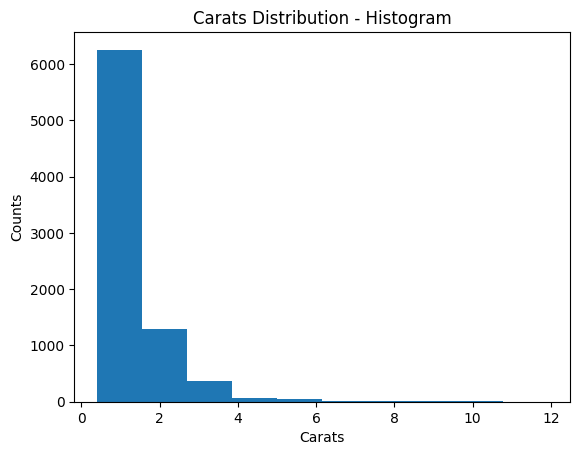

In [ ]:
# Create a histogram for carats
carats_training.plot.hist()
plt.title("Carats Distribution - Histogram")
plt.xlabel("Carats")
plt.ylabel("Counts")
plt.show()

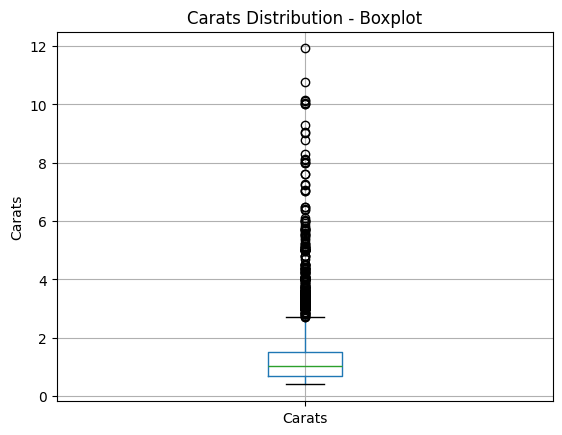

In [ ]:
# Create a histogram for carats
df_training.boxplot(column='Carats')
plt.title("Carats Distribution - Boxplot")
plt.ylabel("Carats")
plt.show()

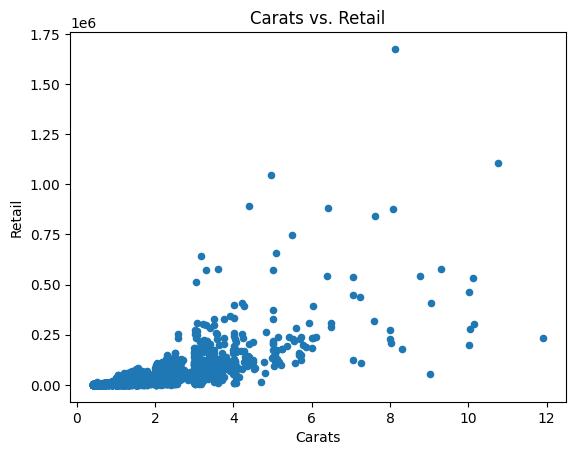

In [ ]:
df_scatter_carats = df_training[["Carats", "Retail"]]
df_scatter_carats.plot.scatter(x='Carats', y='Retail')
plt.title('Carats vs. Retail')
plt.xlabel('Carats')
plt.ylabel('Retail')
plt.show()

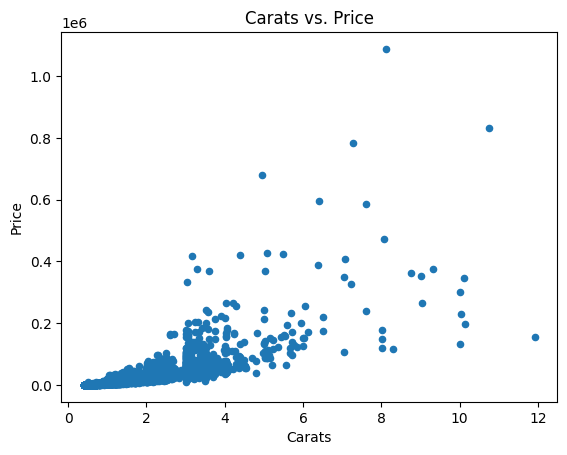

In [ ]:
df_scatter_carats = df_training[["Carats", "Price"]]
df_scatter_carats.plot.scatter(x='Carats', y='Price')
plt.title('Carats vs. Price')
plt.xlabel('Carats')
plt.ylabel('Price')
plt.show()

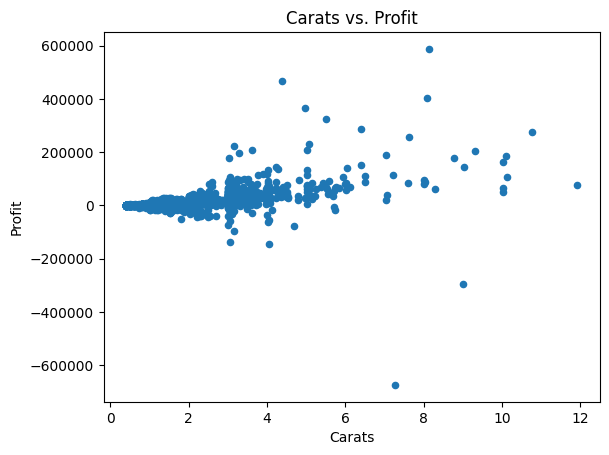

In [ ]:
df_scatter_carats = df_training[["Carats", "Profit"]]
df_scatter_carats.plot.scatter(x='Carats', y='Profit')
plt.title('Carats vs. Profit')
plt.xlabel('Carats')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Calculate and display the correlations
carats_price_corr = round(df_training['Carats'].corr(df_training['Price']), 4)
carats_retail_corr = round(df_training['Carats'].corr(df_training['Retail']), 4)
carats_profit_corr = round(df_training['Carats'].corr(df_training['Profit']), 4)

print(f"Correlation between Carats and Price: {carats_price_corr}")
print(f"Correlation between Carats and Retail: {carats_retail_corr}")
print(f"Correlation between Carats and Profit: {carats_profit_corr}")

Correlation between Carats and Price: 0.7413
Correlation between Carats and Retail: 0.7163
Correlation between Carats and Profit: 0.5137


Key findings regarding carats:
1. The correlation between carats and both price and retail price is large, which means carats is a major determinant of sale price and retail price.
2. From the plots and correlation value, we can see there is a moderate positive correlation between carat and profit. Larger diamonds are more profitable generally, but there might be other factors that also affect profitability.
3. Market Consistency: The similar strength of the correlations between carat size and both price and retail price suggests consistency in how the market values diamonds based on size. This consistency is important for retailers in setting prices and managing inventory.

### Cert - The organization that certified the diamond

In [ ]:
# Check number of unique carats values
unique_cert_counts =  df_training['Cert'].nunique()
unique_cert =  df_training['Cert'].unique()
print("Number of unique certificates: " + str(unique_cert_counts))
print("Unique certificates", unique_cert)

Number of unique certificates: 2
Unique certificates [nan 'AGSL' 'GemEx']


In [ ]:
# There are missing values. Check the number.
print("Number of missing values in 'Cert' in training datasets: ")
df_training['Cert'].isnull().sum()

Number of missing values in 'Cert' in training datasets: 


552

In [ ]:
print("Number of missing values in 'Cert' in offers datasets: ")
df_offers['Cert'].isnull().sum()

Number of missing values in 'Cert' in offers datasets: 


213

Boxplot of cert and LogRetail Price: 


<Axes: xlabel='Cert', ylabel='LogRetail'>

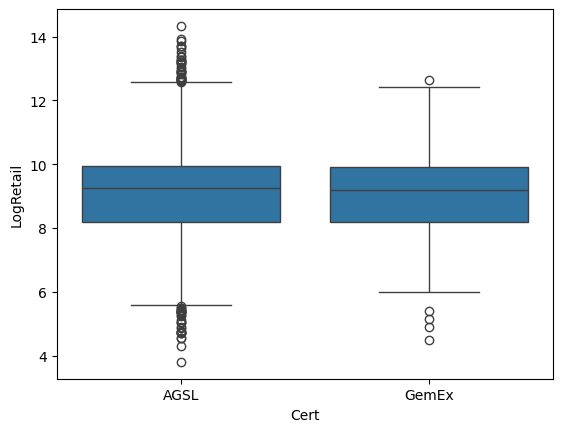

In [ ]:
print("Boxplot of cert and LogRetail Price: ")
sns.boxplot(data = df_training, x='Cert', y='LogRetail')

Boxplot of cert and Profit: 


<Axes: xlabel='Cert', ylabel='Profit'>

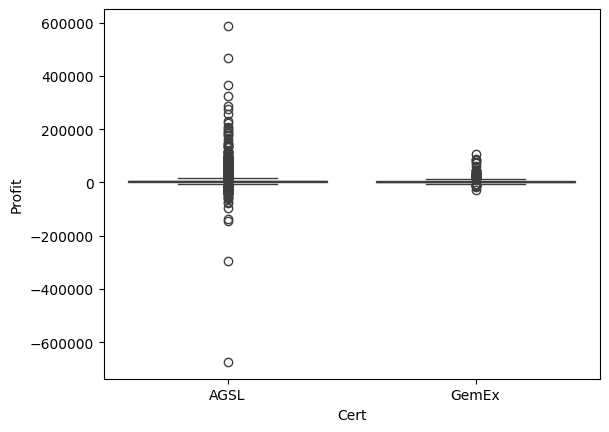

In [ ]:
print("Boxplot of cert and Profit: ")
sns.boxplot(data = df_training, x='Cert', y='Profit')

In [ ]:
# Fill missing values
df_training["Cert"] = df_training["Cert"].fillna("Unknown")
df_offers["Cert"] = df_offers["Cert"].fillna("Unknown")

In [ ]:
# Check the distribution of 'Cert'
df_dist_Cert = df_training.groupby('Cert', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Cert.columns = ['Cert', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                        'Mean_Retail', 'Max_Retail', 'Min_Retail',
                        'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame
display(df_dist_Cert)

,Cert,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,AGSL,6973,15219.116593,1087785,395,21752.096659,1675190,45,6532.980066,587405,-673680
1,GemEx,525,13041.085714,199995,605,18889.076190,307990,90,5847.990476,107995,-26650
2,Unknown,552,15276.576087,472635,430,20722.545290,875780,150,5445.969203,403145,-21995


Key Findings:
1. Cert also has significant impact on pricing. For example, the average retail price and profit on average of AGSL is higher than that of GemEX
2. The profit range is really large, indicating there might be other factors affecting profitability
3. From boxplots, GemEx has more consistent profitability with less extreme values. It might be a safer investment for retailers.

### Clarity - The code for the clarity of the diamond (A measure of the position and size of inclusions in the diamond) Ratings are often given in the Modern GIA grading scale, Flawless, Internally Flawless, Very Very Slightly Included, Very Slightly Included, Slightly Included, and Included, with various sub-levels

In [ ]:
# Check number of unique clarity values
unique_clarity_counts =  df_training['Clarity'].nunique()
unique_clarity =  df_training['Clarity'].unique()
print("Number of unique clarity: " + str(unique_clarity_counts))
print("Unique clarity", unique_clarity)

Number of unique clarity: 12
Unique clarity ['SI1' 'SI2' 'VS2' 'VVS1' 'VS1' 'VVS2' 'I1' 'IF' 'FL' 'I2' 'N' 'I3' nan]


In [ ]:
# There are missing values. Check the number.
print("Number of missing values in 'Clarity' in training datasets: ")
df_training['Clarity'].isnull().sum()

Number of missing values in 'Clarity' in training datasets: 


1

In [ ]:
print("Number of missing values in 'Clarity' in offers datasets: ")
df_offers['Clarity'].isnull().sum()

Number of missing values in 'Clarity' in offers datasets: 


0

Countplot of Clarity: 


<Axes: xlabel='Clarity', ylabel='count'>

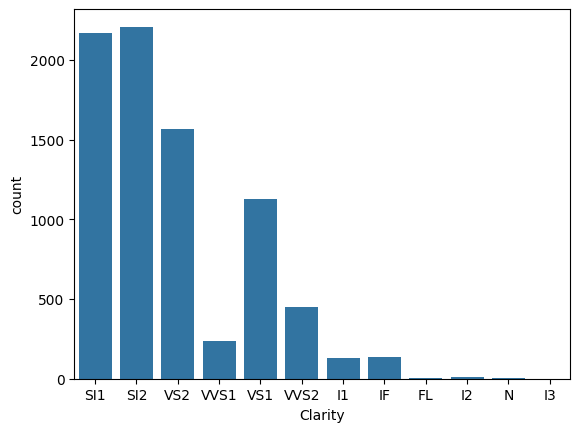

In [ ]:
print("Countplot of Clarity: ")
sns.countplot(data = df_training, x = 'Clarity')

In [ ]:
# Fill missing values
df_training["Clarity"] = df_training["Clarity"].fillna("Unknown")

In [ ]:
# Check the distribution of 'Clarity'
df_dist_Clarity = df_training.groupby('Clarity', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Clarity.columns = ['Clarity', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                           'Mean_Retail', 'Max_Retail', 'Min_Retail',
                           'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame
display(df_dist_Clarity)

,Clarity,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,FL,2,290750.000000,416570,164930,447307.500000,640875,253740,156557.500000,224305,88810
1,I1,132,4331.439394,24035,580,6545.037879,33695,155,2213.598485,11795,-1200
2,I2,13,3421.923077,15725,845,5024.615385,19495,1380,1602.692308,3770,270
3,I3,1,4195.000000,4195,4195,6190.000000,6190,6190,1995.000000,1995,1995
4,IF,137,60433.065693,1087785,780,83908.394161,1675190,1195,23475.328467,587405,-673680
5,N,2,1205.000000,1435,975,2390.000000,2800,1980,1185.000000,1365,1005
6,SI1,2168,12181.529059,407830,430,17257.022601,538905,45,5075.493542,188965,-73500
7,SI2,2208,10363.453351,352210,395,14638.992301,465330,90,4275.538949,162865,-296215
8,Unknown,1,10010.000000,10010,10010,15400.000000,15400,15400,5390.000000,5390,5390
9,VS1,1130,19038.721239,595425,550,27469.699115,882415,195,8430.977876,286990,-40610


Key Findings:
1. Clarity is also a significant factor affecting price and profits. Higher clarity grades (e.g., FL, IF) command higher prices and profits, reflecting their premium status.
2. There is a wide range of variability in profitability across different clarity categories. There are losses across all categories.
3. VS1, VVS1, SI1 are probably better choices, They have good profitability and with less risks.

### Color - The code for the color of the diamond. Diamonds are generally rated on a scale from D meaning colorless, to Z having the most yellow. Some diamonds are rated on seperate scales, espcially “fancy color” diamonds

In [ ]:
# Check number of unique color values
unique_color_counts =  df_training['Color'].nunique()
unique_color =  df_training['Color'].unique()
print("Number of unique color: " + str(unique_color_counts))
print("Unique color", unique_color)

Number of unique color: 32
Unique color ['L' 'M' 'K' 'J' 'F' 'I' 'H' 'G' 'E' 'D' 'N' 'Ffcly' 'Ffcdbrown'
 'Fvyellow' 'Fdy' 'Fyellow' 'U' 'Flyellow' 'Ffg' 'Q-r' 'S' 'Lb' 'Fiyellow'
 'Gy' 'Fdpink' 'Ffcy' 'P' 'Fiy' 'Ffcg' 'Fly' 'W' 'O-p']


In [ ]:
# Check the number of missing values
print("Number of missing values in 'Color' in training datasets: ")
df_training['Color'].isnull().sum()

Number of missing values in 'Color' in training datasets: 


0

In [ ]:
print("Number of missing values in 'Color' in offers datasets: ")
df_offers['Color'].isnull().sum()

Number of missing values in 'Color' in offers datasets: 


0

Countplot of Color: 


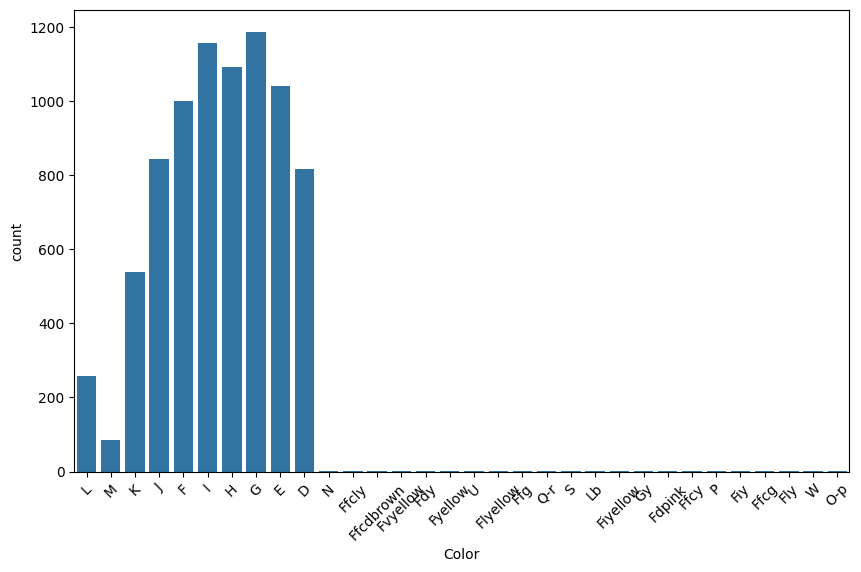

In [ ]:
print("Countplot of Color: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Color')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the distribution of 'Color'
df_dist_Color = df_training.groupby('Color', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Color.columns = ['Color', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                         'Mean_Retail', 'Max_Retail', 'Min_Retail',
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Color.sort_values(by='Unique_IDs', ascending=False))

,Color,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
16,G,1188,14704.234007,830540,635,19865.277778,1104805,90,5161.043771,274265,-673680
19,I,1158,14810.384283,302465,395,20940.267703,465330,110,6129.883420,162865,-38970
18,H,1092,15497.399267,586790,580,22212.550366,875780,155,6715.151099,403145,-97425
1,E,1042,15325.724568,595425,500,21485.686180,882415,45,6159.961612,286990,-145630
2,F,1000,15387.440000,1087785,635,22601.420000,1675190,135,7213.980000,587405,-40610
20,J,843,11989.762752,375425,555,17133.914591,578155,75,5144.151839,202730,-62355
0,D,816,22273.529412,681120,455,33025.104167,1047880,190,10751.574755,467855,-41630
21,K,540,11245.268519,177020,545,15988.083333,272340,95,4742.814815,95320,-76020
22,L,259,9084.961390,148385,430,13179.613900,227255,115,4094.652510,89460,-6775
24,M,85,15943.294118,346630,405,23049.352941,531035,225,7106.058824,184405,-5035


Key findings:
1. Color is a significant factor affecting price and profitability. Diamonds with different colors has a variance of prices and profits.
2. The variablility in profitability across color grades is very significant. Higher profits always come with higher probability of losses.

In [ ]:
# # Step 1: Check if the 'Color_combined' column exists, if not, initialize it with original 'Color' values
# if 'Color_combined' not in df_dist_Color.columns:
#     df_dist_Color['Color_combined'] = df_dist_Color['Color']  # Initialize with original color names

# # Define what counts as a rare category based on 'Unique_IDs' threshold (e.g., 5 or fewer)
# rare_threshold = 5

# # Define thresholds for combining similar rows
# price_threshold = 1000  # Adjust based on the range of prices
# retail_threshold = 1000  # Adjust based on the range of retail prices

# # Step 2: Identify rare and non-rare categories
# rare_colors = df_dist_Color[df_dist_Color['Unique_IDs'] <= rare_threshold]['Color_combined']
# non_rare_colors = df_dist_Color[df_dist_Color['Unique_IDs'] > rare_threshold]['Color_combined']

# # Step 3: Create a function to merge rare categories into non-rare ones
# def combine_rare_into_nonrare(df, price_thresh, retail_thresh):
#     combine_mapping = {}

#     # Iterate over rare categories
#     for rare_color in rare_colors:
#         rare_mean_price = df[df['Color_combined'] == rare_color]['Mean_Price'].values[0]
#         rare_mean_retail = df[df['Color_combined'] == rare_color]['Mean_Retail'].values[0]

#         # Find the closest non-rare category based on Mean_Price and Mean_Retail
#         non_rare_subset = df[df['Color_combined'].isin(non_rare_colors)]
#         non_rare_subset['price_diff'] = abs(non_rare_subset['Mean_Price'] - rare_mean_price)
#         non_rare_subset['retail_diff'] = abs(non_rare_subset['Mean_Retail'] - rare_mean_retail)

#         # Debugging: Print the differences for each rare category
#         print(f"Rare Color: {rare_color}")
#         print(non_rare_subset[['Color_combined', 'price_diff', 'retail_diff']])

#         # Find the non-rare category with the closest values
#         closest_non_rare = non_rare_subset.loc[(non_rare_subset['price_diff'] <= price_thresh) &
#                                                (non_rare_subset['retail_diff'] <= retail_thresh)]

#         if not closest_non_rare.empty:
#             # Choose the closest one based on minimal price_diff and retail_diff
#             closest_non_rare_color = closest_non_rare.iloc[0]['Color_combined']

#             # Combine the rare category into the closest non-rare category
#             combined_name = f"{closest_non_rare_color}_{rare_color}"
#             combine_mapping[rare_color] = combined_name

#     return combine_mapping

# # Step 4: Apply the function to find and combine rare categories
# combine_mapping = combine_rare_into_nonrare(df_dist_Color, price_threshold, retail_threshold)

# # Step 5: Apply the combine_mapping to rename combined rows dynamically
# df_dist_Color['Color_combined'] = df_dist_Color['Color_combined'].apply(lambda x: combine_mapping.get(x, x))

# # Step 6: Sort the dataframe by descending order of 'Unique_IDs'
# df_sorted = df_dist_Color.sort_values(by='Unique_IDs', ascending=False).reset_index(drop=True)

# # Step 7: Display the sorted and renamed dataframe
# df_sorted_display = df_sorted[['Color_combined', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
#                                'Mean_Retail', 'Max_Retail', 'Min_Retail', 'Mean_Profit', 'Max_Profit', 'Min_Profit']]

# df_sorted_display
# Calculate percentage of id for each Color
df_dist_color = df_training.groupby('Color', dropna=False).agg({
    'id': 'nunique'
}).reset_index()

df_dist_color.columns = ['Color', 'Unique_IDs']
df_dist_color['pct_id'] = df_dist_color['Unique_IDs'] / df_dist_color['Unique_IDs'].sum()
display(df_dist_color)

# One-Hot Encoding for top N colors
top_n = 8
top_colors = df_training['Color'].value_counts().nlargest(top_n).index

# Calculate the percentage of IDs from the top N colors
display(df_dist_color[df_dist_color['Color'].isin(top_colors)])
pct_top_colors_id = df_dist_color[df_dist_color['Color'].isin(top_colors)]['pct_id'].sum()
print(f'The percentage of id from the top {top_n} colors: {round(pct_top_colors_id, 4)}')

,Color,Unique_IDs,pct_id
0,D,816,0.101366
1,E,1042,0.129441
2,F,1000,0.124224
3,Fdpink,1,0.000124
4,Fdy,2,0.000248
5,Ffcdbrown,2,0.000248
6,Ffcg,1,0.000124
7,Ffcly,1,0.000124
8,Ffcy,1,0.000124
9,Ffg,2,0.000248


,Color,Unique_IDs,pct_id
0,D,816,0.101366
1,E,1042,0.129441
2,F,1000,0.124224
16,G,1188,0.147578
18,H,1092,0.135652
19,I,1158,0.143851
20,J,843,0.104720
21,K,540,0.067081


The percentage of id from the top 8 colors: 0.9539


### Cut - The quality of the cut of the diamond

In [ ]:
# Check number of unique cut values
unique_cut_counts =  df_training['Cut'].nunique()
unique_cut =  df_training['Cut'].unique()
print("Number of unique cut: " + str(unique_cut_counts))
print("Unique cut", unique_cut)

Number of unique cut: 6
Unique cut [' ' 'Excellent' 'Very good' 'Good' 'Fair' 'Ideal']


In [ ]:
# Check the number of missing values
print("Number of missing values in 'Cut' in training datasets: ")
df_training['Cut'].isnull().sum()

Number of missing values in 'Cut' in training datasets: 


0

In [ ]:
print("Number of missing values in 'Cut' in offers datasets: ")
df_offers['Cut'].isnull().sum()

Number of missing values in 'Cut' in offers datasets: 


0

In [ ]:
# Replace empty strings with 'Missing' in the 'Cut' column for both training and offers datasets
df_training['Cut'] = np.where(df_training['Cut'].str.strip() == '', 'Missing', df_training['Cut'])
df_offers['Cut'] = np.where(df_offers['Cut'].str.strip() == '', 'Missing', df_offers['Cut'])

Countplot of Cut: 


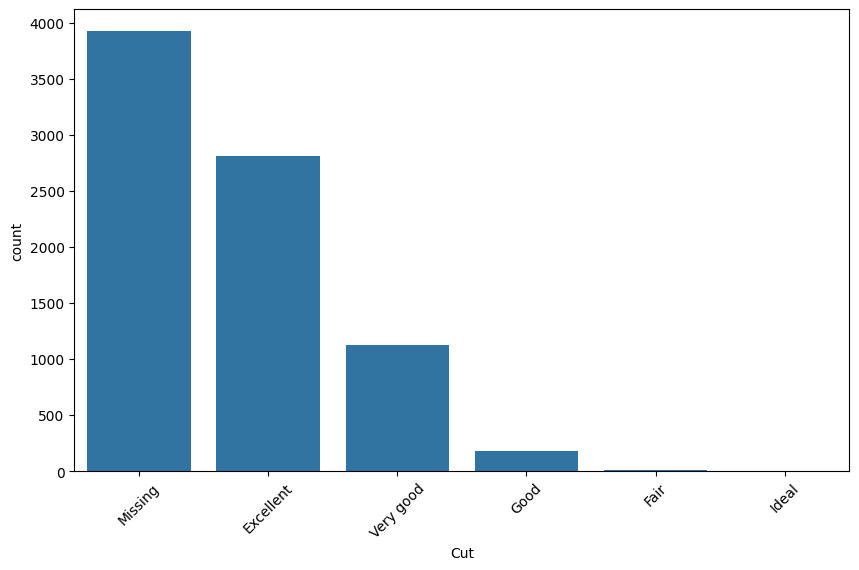

In [ ]:
print("Countplot of Cut: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Cut')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the distribution of 'Cut'
df_dist_Cut = df_training.groupby('Cut', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Cut.columns = ['Cut', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                         'Mean_Retail', 'Max_Retail', 'Min_Retail',
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Cut.sort_values(by='Unique_IDs', ascending=False))

,Cut,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
4,Missing,3922,11707.322794,1087785,395,16759.295003,1675190,45,5051.972208,587405,-673680
0,Excellent,2811,21762.340804,830540,635,30849.548203,1104805,155,9087.207400,467855,-137830
5,Very good,1123,10791.442565,302465,635,15498.325913,465330,150,4706.883348,162865,-18690
2,Good,178,7419.831461,177020,745,10583.876404,272340,420,3164.044944,95320,-18155
1,Fair,15,51291.000000,363920,405,76339.333333,540850,455,25048.333333,176930,-2135
3,Ideal,1,103195.000000,103195,103195,151305.000000,151305,151305,48110.000000,48110,48110


Key Findings:
1. The quality of cut significantly impacts the price and profitability. We can see higher cut grades are correlated with higher price and profits.
2. There are losses across all categories
3. The most popular choices are excellent and very good cuts because they have generally good profitability and affordability.
4. The one ideal diamond has extremely high pricing, which means there is premium for top tier qualilty diamonds.
5. There are lots of diamonds without cut information

### Depth - The depth percentage of the diamond

In [ ]:
# Check number of unique depth values
unique_depth_counts =  df_training['Depth'].nunique()
unique_depth =  df_training['Depth'].unique()
print("Number of unique depths: " + str(unique_depth_counts))
print("Unique depths", unique_depth)

Number of unique depths: 115
Unique depths [65.4 61.7 64.  62.7 63.  59.9 63.4 62.4  nan 62.9 62.1 64.3 59.4 62.8
 62.  58.2 60.8 61.4 62.3 60.9 62.2 64.4 61.1 61.3 61.6 61.8 63.1 62.6
 60.4 60.  60.6 60.3 64.1 63.2 59.3 63.5 64.8 59.  60.2 63.6 64.5 59.5
 59.6 63.7 61.2 64.7 63.9 59.1 58.9 60.1 62.5 64.6 59.7 61.  60.5 61.5
 63.3 60.7 58.  61.9 63.8 65.2 58.7 64.2 56.  58.6 64.9 58.5 59.8 55.9
 59.2 58.8 56.6 58.3 57.9 56.8 56.7 65.3 57.8 57.5 66.  54.9 65.8 65.
 57.7 66.2 65.9 66.8 58.1 66.1 58.4 65.7 65.6 69.4 65.1 65.5 66.3 57.6
 57.1  0.  66.6 56.9 55.3 57.3 67.6 56.5 57.4 67.9 51.7 52.7 50.8 69.7
 54.8 57.  55.8 68.5]


In [ ]:
# There are missing values. Check the number.
print("Number of missing values in 'Depth' in training datasets: ")
df_training['Depth'].isnull().sum()

Number of missing values in 'Depth' in training datasets: 


1440

In [ ]:
print("Number of missing values in 'Depth' in offers datasets: ")
df_offers['Depth'].isnull().sum()

Number of missing values in 'Depth' in offers datasets: 


497

In [ ]:
# Identify continuous variables in the training dataset
list_continuous_vars = df_training.select_dtypes(include=[np.number]).columns.tolist()
excluded_vars = ['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Vendor', 'Profit']
list_continuous_vars = [var for var in list_continuous_vars if var not in excluded_vars]

# Display the list of continuous variables
print("List of Continuous Variables:")
print(f"Number of continuous variables: {len(list_continuous_vars)}")
print(list_continuous_vars)

List of Continuous Variables:
Number of continuous variables: 3
['Carats', 'Depth', 'Table']


In [ ]:
# Check for ids with missing Depth in the training dataset
df_training_missing_Depth = df_training[df_training['Depth'].isnull()]

# Display the first few rows, selected columns, and shape of the training dataset with missing Depth
print("Training Dataset - Missing Depth:")
display(df_training_missing_Depth.head())
display(df_training_missing_Depth[['id', 'Depth']].head())
print("Shape:", df_training_missing_Depth.shape)

# List of ids with missing Depth in the training dataset
list_id_missing_Depth_train = df_training_missing_Depth['id'].tolist()
print("Number of IDs with Missing Depth in Training Dataset:", len(list_id_missing_Depth_train))

# Check for ids with missing Depth in the offers dataset
df_offers_missing_Depth = df_offers[df_offers['Depth'].isnull()]

# Display the first few rows, selected columns, and shape of the offers dataset with missing Depth
print("\nOffers Dataset - Missing Depth:")
display(df_offers_missing_Depth.head())
display(df_offers_missing_Depth[['id', 'Depth']].head())
print("Shape:", df_offers_missing_Depth.shape)

# List of ids with missing Depth in the offers dataset
list_id_missing_Depth_offers = df_offers_missing_Depth['id'].tolist()
print("Number of IDs with Missing Depth in Offers Dataset:", len(list_id_missing_Depth_offers))

Training Dataset - Missing Depth:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit
8,9,0.40,AGSL,SI1,L,Missing,NaN,False,4.77x4.75x2.93,Excellent,Botswana,Round,Very good,58.0,1,585,885,6.371612,6.785588,300
12,13,0.41,AGSL,SI2,K,Missing,NaN,False,4.76x4.73x2.94,Excellent,Botswana,Oval,Excellent,NaN,1,595,970,6.388561,6.877296,375
15,16,0.42,AGSL,SI1,L,Missing,NaN,False,4.83x4.82x2.98,Excellent,South Africa,Round,Very good,58.0,1,600,805,6.396930,6.690842,205
19,20,0.40,GemEx,SI1,K,Missing,NaN,False,4.71x4.68x2.95,Very good,Angola,Princess,Excellent,58.0,1,605,1000,6.405228,6.907755,395
20,21,0.42,AGSL,VS2,K,Missing,NaN,False,4.81x4.79x2.99,Excellent,Botswana,Round,Excellent,NaN,1,610,625,6.413459,6.437752,15


,id,Depth
8,9,NaN
12,13,NaN
15,16,NaN
19,20,NaN
20,21,NaN


Shape: (1440, 20)
Number of IDs with Missing Depth in Training Dataset: 1440

Offers Dataset - Missing Depth:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
7,8058,0.42,AGSL,VVS2,M,Missing,NaN,NaN,4.81x4.79x2.89,Very good,Russia,Round,Very good,NaN,1,NaN
13,8064,0.40,GemEx,VVS2,L,Missing,NaN,NaN,4.69x4.65x3,Very good,Russia,Oval,Very good,54.0,1,NaN
32,8083,0.40,AGSL,SI2,G,Missing,NaN,NaN,4.72x4.7x2.93,Very good,Botswana,Round,Excellent,NaN,1,NaN
35,8086,0.40,AGSL,SI1,I,Missing,NaN,NaN,4.69x4.64x3,Excellent,Botswana,Princess,Very good,NaN,1,NaN
37,8088,0.40,AGSL,VVS1,J,Missing,NaN,NaN,4.62x4.59x2.97,Very good,Angola,Round,Good,NaN,1,NaN


,id,Depth
7,8058,NaN
13,8064,NaN
32,8083,NaN
35,8086,NaN
37,8088,NaN


Shape: (497, 16)
Number of IDs with Missing Depth in Offers Dataset: 497


In [ ]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Set the number of neighbors

# Impute missing values in the training dataset
imputed_train_data = imputer.fit_transform(df_training[list_continuous_vars])

# Convert the imputed array back to a DataFrame
df_training_imputed = pd.DataFrame(imputed_train_data, columns=list_continuous_vars)

# Display the first few rows and the shape of the imputed training dataset
print("Imputed Training Dataset:")
display(df_training_imputed.head())
print("Shape:", df_training_imputed.shape)

# Fill missing values for Depth in the training dataset
df_training['Depth'] = df_training_imputed['Depth']

# Display the first few rows and the shape of Depth in the training dataset
print("\nTraining Dataset - Depth After Imputation:")
display(df_training[df_training.id.isin(list_id_missing_Depth_train)][['id', 'Depth']].head())
print("Shape of Missing Depth in Training Dataset After Imputation:", df_training[df_training.id.isin(list_id_missing_Depth_train)].shape)

# Impute missing values in the offers dataset using the same imputer
imputed_test_data = imputer.transform(df_offers[list_continuous_vars])

# Convert the imputed array back to a DataFrame
df_offers_imputed = pd.DataFrame(imputed_test_data, columns=list_continuous_vars)

# Display the first few rows and the shape of the imputed offers dataset
print("\nImputed Offers Dataset:")
display(df_offers_imputed.head())
print("Shape:", df_offers_imputed.shape)

# Fill missing values for Depth in the offers dataset
df_offers['Depth'] = df_offers_imputed['Depth']

# Display the first few rows and the shape of Depth in the offers dataset
print("\nOffers Dataset - Depth After Imputation:")
display(df_offers[df_offers.id.isin(list_id_missing_Depth_offers)][['id', 'Depth']].head())
print("Shape of Missing Depth in Offers Dataset After Imputation:", df_offers[df_offers.id.isin(list_id_missing_Depth_offers)].shape)


Imputed Training Dataset:


,Carats,Depth,Table
0,0.41,65.4,56.666667
1,0.42,61.7,57.666667
2,0.40,64.0,57.000000
3,0.41,62.7,58.000000
4,0.40,63.0,58.000000


Shape: (8050, 3)

Training Dataset - Depth After Imputation:


,id,Depth
8,9,63.100000
12,13,63.600000
15,16,61.000000
19,20,63.100000
20,21,61.733333


Shape of Missing Depth in Training Dataset After Imputation: (1440, 20)

Imputed Offers Dataset:


,Carats,Depth,Table
0,0.42,62.7,57.0
1,0.40,63.8,59.0
2,0.41,62.2,58.0
3,0.40,64.2,58.0
4,0.40,64.3,57.0


Shape: (2683, 3)

Offers Dataset - Depth After Imputation:


,id,Depth
7,8058,61.733333
13,8064,62.100000
32,8083,62.300000
35,8086,62.300000
37,8088,62.300000


Shape of Missing Depth in Offers Dataset After Imputation: (497, 16)


In [ ]:
# Calculate and display the correlations
depth_price_corr = round(df_training['Depth'].corr(df_training['Price']), 4)
depth_retail_corr = round(df_training['Depth'].corr(df_training['Retail']), 4)
depth_profit_corr = round(df_training['Depth'].corr(df_training['Profit']), 4)

print(f"Correlation between Depth and Price: {depth_price_corr}")
print(f"Correlation between Depth and Retail: {depth_retail_corr}")
print(f"Correlation between Depth and Profit: {depth_profit_corr}")

Correlation between Depth and Price: -0.0558
Correlation between Depth and Retail: -0.0548
Correlation between Depth and Profit: -0.0408


Key findings:
1. The correlation value between depth and price/profit is very low, indicating depth is not a significant factor of diamonds. We need to focus on other factors.

### Known_Conflict_Diamond - A flag identifying if the diamond was known to have been illegally traded

In [ ]:
# Check number of unique known conflicts values
unique_known_conflicts_counts =  df_training['Known_Conflict_Diamond'].nunique()
unique_known_conflicts =  df_training['Known_Conflict_Diamond'].unique()
print("Number of unique Known Conflict Diamond Values: " + str(unique_known_conflicts_counts))
print("Unique Known Conflict Diamond Values:", unique_known_conflicts)

Number of unique Known Conflict Diamond Values: 2
Unique Known Conflict Diamond Values: [False  True]


In [ ]:
# Check the number of missing values
print("Number of missing values in 'Known_Conflict_Diamond' in training datasets: ")
df_training['Known_Conflict_Diamond'].isnull().sum()

Number of missing values in 'Known_Conflict_Diamond' in training datasets: 


0

In [ ]:
print("Number of missing values in 'Known_Conflict_Diamond' in offers datasets: ")
df_offers['Known_Conflict_Diamond'].isnull().sum()

Number of missing values in 'Known_Conflict_Diamond' in offers datasets: 


2378

In [ ]:
# Check the distribution of 'Known_Conflict_Diamond'
df_dist_conflict = df_training.groupby('Known_Conflict_Diamond', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_conflict.columns = ['Known_Conflict_Diamond', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                            'Mean_Retail', 'Max_Retail', 'Min_Retail',
                            'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_conflict.sort_values(by='Unique_IDs', ascending=False))

,Known_Conflict_Diamond,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,False,7741,15025.439866,1087785,395,22257.513241,1675190,380,7232.073376,587405,-41255
1,True,309,16473.171521,783180,500,2386.957929,109500,45,-14086.213592,-455,-673680


Key Findings:
1. The known conflict situation of diamonds has significant impact on average retail price and profit. Diamonds which have known conflicts has a much lower retail price and lower profit compared to which do not have conflicts. This shows how the market perceives conflict diamonds negatively.

In [ ]:
# Fill missing values in the 'Known_Conflict_Diamond' column for the offers dataset
df_offers['Known_Conflict_Diamond'] = df_offers['Known_Conflict_Diamond'].fillna(False)

### Measurements - The length x width x depth of the diamond expressed in millimeters

In [ ]:
# Function to check if the format is correct
def is_valid_dimension(value):
    # Valid format: "number x number x number"
    parts = value.split('x')
    if len(parts) != 3:
        return False
    try:
        # Check if each part can be converted to a float
        for part in parts:
            float(part.strip())
        return True
    except ValueError:
        return False

# Apply the function to check each dimension in the training dataset
df_training['Valid_Measurements'] = df_training['Measurements'].apply(is_valid_dimension)

# Apply the function to check each dimension in the offers dataset
df_offers['Valid_Measurements'] = df_offers['Measurements'].apply(is_valid_dimension)

# Identify and display invalid dimensions in the training dataset
print("Invalid Measurements in Training Dataset:")
display(df_training[~df_training['Valid_Measurements']])

# Identify and display invalid dimensions in the offers dataset
print("\nInvalid Measurements in Offers Dataset:")
display(df_offers[~df_offers['Valid_Measurements']])

Invalid Measurements in Training Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,...,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit,Valid_Measurements



Invalid Measurements in Offers Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Valid_Measurements
826,8877,1.03,AGSL,SI1,I,Missing,62.7,False,6.42*6.47*4.04,Excellent,DR Congo,Round,Excellent,57.0,2,NaN,False


In [ ]:
# We only have one measurement that has wrong formula. We can change that.
df_offers.loc[df_offers['Measurements'] == '6.42*6.47*4.04', 'Measurements'] = '6.42x6.47x4.04'

In [ ]:
# Check the number of unique Measurements and display the unique values
unique_measurements_count = df_training['Measurements'].nunique()
unique_measurements = df_training['Measurements'].unique()

print(f"Number of unique Measurements: {unique_measurements_count}")

if unique_measurements_count < 20:
    print("Unique Measurements:", unique_measurements)


Number of unique Measurements: 7408


In [ ]:
# Split the Measurements column into Length, Width, and Depth_Measurement for the training dataset
measurements_revise_training = df_training['Measurements'].str.split('x', n=3, expand=True)
df_training['Length'] = measurements_revise_training[0].astype(float)
df_training['Width'] = measurements_revise_training[1].astype(float)
df_training['Depth_Measurement'] = measurements_revise_training[2].astype(float)

# Split the Measurements column into Length, Width, and Depth_Measurement for the offers dataset
measurements_revise_offers = df_offers['Measurements'].str.split('x', n=3, expand=True)
df_offers['Length'] = measurements_revise_offers[0].astype(float)
df_offers['Width'] = measurements_revise_offers[1].astype(float)
df_offers['Depth_Measurement'] = measurements_revise_offers[2].astype(float)


#### Length

In [ ]:
# Check number of unique depth values
unique_length_counts =  df_training['Length'].nunique()
unique_length =  df_training['Length'].unique()
print("Number of unique lengths: " + str(unique_length_counts))
if unique_length_counts < 20:
    print("Unique Length values:", unique_lengths)

Number of unique lengths: 627


In [ ]:
# Create a histogram and a box plot for the 'Length' column
fig = px.histogram(df_training, x='Length', nbins=30, title='Histogram of Length')
fig.show()

fig = px.box(df_training, 'Length', title='Box Plot of Length')
fig.show()

In [ ]:
# Calculate and display the correlations
length_price_corr = round(df_training['Length'].corr(df_training['Price']), 4)
length_retail_corr = round(df_training['Length'].corr(df_training['Retail']), 4)
length_profit_corr = round(df_training['Length'].corr(df_training['Profit']), 4)

print(f"Correlation between Length and Price: {length_price_corr}")
print(f"Correlation between Length and Retail: {length_retail_corr}")
print(f"Correlation between Length and Profit: {length_profit_corr}")

Correlation between Length and Price: 0.6255
Correlation between Length and Retail: 0.6068
Correlation between Length and Profit: 0.4396


#### Width

In [ ]:
# Check the number of unique Width values and display the unique values
unique_width_count = df_training['Width'].nunique()
unique_widths = df_training['Width'].unique()

print(f"Number of unique Width values: {unique_width_count}")

if unique_width_count < 20:
    print("Unique Width values:", unique_widths)

Number of unique Width values: 645


In [ ]:
# Create a histogram and a box plot for the 'Width' column
fig = px.histogram(df_training, x='Width', nbins=30, title='Histogram of Width')
fig.show()

fig = px.box(df_training, 'Width', title='Box Plot of Width')
fig.show()

In [ ]:
# Calculate and display the correlations
width_price_corr = round(df_training['Width'].corr(df_training['Price']), 4)
width_retail_corr = round(df_training['Width'].corr(df_training['Retail']), 4)
width_profit_corr = round(df_training['Width'].corr(df_training['Profit']), 4)

print(f"Correlation between Width and Price: {width_price_corr}")
print(f"Correlation between Width and Retail: {width_retail_corr}")
print(f"Correlation between Width and Profit: {width_profit_corr}")

Correlation between Width and Price: 0.6248
Correlation between Width and Retail: 0.6063
Correlation between Width and Profit: 0.4394


#### Depth

In [ ]:
# Check the number of unique Depth_Measurement values and display the unique values
unique_depth_measurement_count = df_training['Depth_Measurement'].nunique()
unique_depth_measurements = df_training['Depth_Measurement'].unique()

print(f"Number of unique Depth_Measurement values: {unique_depth_measurement_count}")

if unique_depth_measurement_count < 20:
    print("Unique Depth_Measurement values:", unique_depth_measurements)

Number of unique Depth_Measurement values: 428


In [ ]:
# Create a histogram and a box plot for the 'Depth_Measurement' column
fig = px.histogram(df_training, x='Depth_Measurement', nbins=30, title='Histogram of Depth_Measurement')
fig.show()

fig = px.box(df_training, 'Depth_Measurement', title='Box Plot of Depth_Measurement')
fig.show()

In [ ]:
# Calculate and display the correlations
depth_measurement_price_corr = round(df_training['Depth_Measurement'].corr(df_training['Price']), 4)
depth_measurement_retail_corr = round(df_training['Depth_Measurement'].corr(df_training['Retail']), 4)
depth_measurement_profit_corr = round(df_training['Depth_Measurement'].corr(df_training['Profit']), 4)

print(f"Correlation between Depth_Measurement and Price: {depth_measurement_price_corr}")
print(f"Correlation between Depth_Measurement and Retail: {depth_measurement_retail_corr}")
print(f"Correlation between Depth_Measurement and Profit: {depth_measurement_profit_corr}")


Correlation between Depth_Measurement and Price: 0.6195
Correlation between Depth_Measurement and Retail: 0.6009
Correlation between Depth_Measurement and Profit: 0.4352


Key findings:
1. In general, All three dimensions have moderate positive correlations with price, retailprice, and profit. They are significant factors that need to be considered.
2. Their effects are quite consistent with generally same impacts on price, retailprice, and profit.
3. While correlations with profits are slightly lower than those with price and retail, it stil shows larger dimensions lead to higher profitability.

### Polish - The quality of the polish of the dimaond

In [ ]:
# Check number of unique polish values
unique_polish_counts =  df_training['Polish'].nunique()
unique_polish =  df_training['Polish'].unique()
print("Number of unique polish: " + str(unique_polish_counts))
print("Unique polish", unique_polish)

Number of unique polish: 4
Unique polish ['Very good' 'Excellent' 'Good' ' ']


In [ ]:
# Replace empty strings with 'Missing' in the 'Polish' column for both training and offers datasets
df_training['Polish'] = np.where(df_training['Polish'].str.strip() == '', 'Missing', df_training['Polish'])
df_offers['Polish'] = np.where(df_offers['Polish'].str.strip() == '', 'Missing', df_offers['Polish'])


Countplot of Polish: 


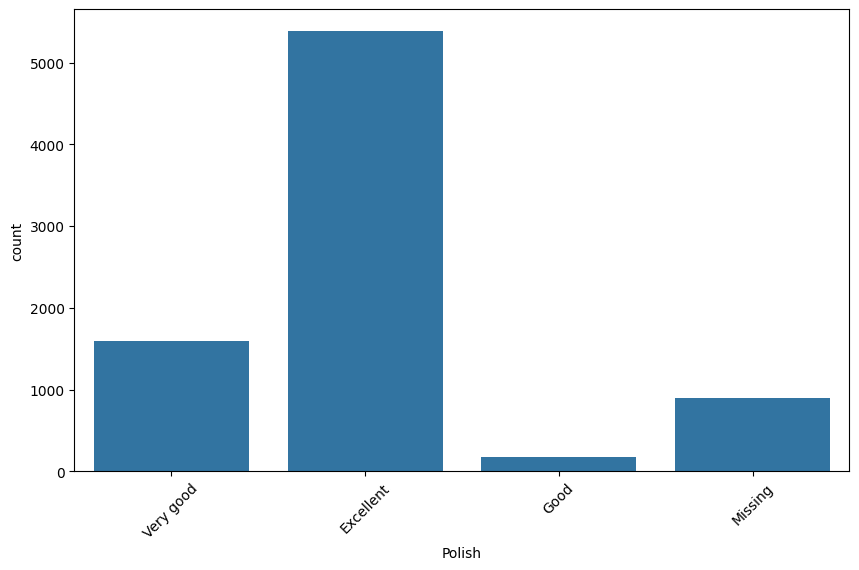

In [ ]:
print("Countplot of Polish: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Polish')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the distribution of 'Polish'
df_dist_Polish = df_training.groupby('Polish', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Polish.columns = ['Polish', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                          'Mean_Retail', 'Max_Retail', 'Min_Retail',
                          'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Polish.sort_values(by='Unique_IDs', ascending=False))

,Polish,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,Excellent,5383,18356.310607,1087785,395,26070.014862,1675190,45,7713.704254,587405,-673680
3,Very good,1589,8036.740088,238365,405,11586.233480,334725,75,3549.493392,117155,-20990
2,Missing,899,9443.726363,346630,455,13785.289210,531035,120,4341.562848,184405,-17275
1,Good,179,7429.217877,132865,635,10584.301676,199065,330,3155.083799,66200,-26825


Key findings:
1. Polish seems to be an important factor affecting price, retail, profit. When polish grade is higher, we get higher averate retail price and profit.
2. Although the average profit for excellent diamonds are high, buying excellent diamonds may also lead to higher losses. The very good and good diamonds are safer choices.

###
Regions - The region from which the diamond originated

In [ ]:
# Check number of unique region values
unique_regions_counts =  df_training['Regions'].nunique()
unique_regions =  df_training['Regions'].unique()
print("Number of unique regions: " + str(unique_regions_counts))
print("Unique regions", unique_regions)

Number of unique regions: 9
Unique regions ['Other/Unknown' 'Russia' 'South Africa' 'Botswana' 'Canada' 'DR Congo'
 'Zimbabwe' 'Angola' 'Australia']


Countplot of Regions: 


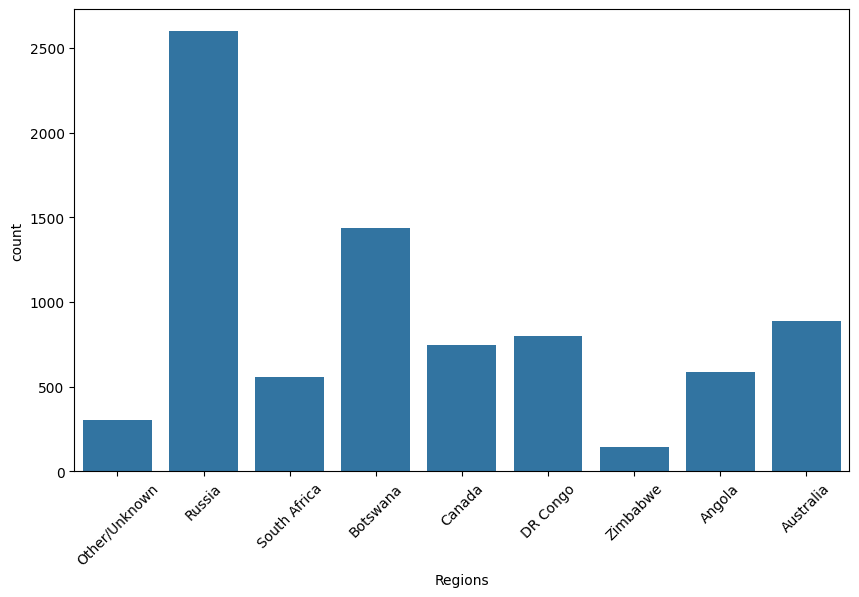

In [ ]:
print("Countplot of Regions: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Regions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the number of missing values
print("Number of missing values in 'Regions' in training datasets: ")
df_training['Regions'].isnull().sum()

Number of missing values in 'Regions' in training datasets: 


0

In [ ]:
# Check the number of missing values
print("Number of missing values in 'Regions' in offers datasets: ")
df_offers['Regions'].isnull().sum()

Number of missing values in 'Regions' in offers datasets: 


0

In [ ]:
# Check the distribution of 'Regions'
df_dist_Regions = df_training.groupby('Regions', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Regions.columns = ['Regions', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                           'Mean_Retail', 'Max_Retail', 'Min_Retail',
                           'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Regions.sort_values(by='Unique_IDs', ascending=False))

,Regions,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
6,Russia,2599,15215.182763,428080,395,22927.751058,658580,380,7712.568295,230500,-19780
2,Botswana,1438,14885.761474,830540,405,21210.462448,1104805,455,6324.700974,286990,-19330
1,Australia,887,13390.434047,349940,545,20339.808343,538905,625,6949.374295,188965,-16935
4,DR Congo,796,16163.473618,783180,595,17887.305276,745880,90,1723.831658,322685,-673680
3,Canada,745,16307.046980,1087785,570,25142.114094,1675190,645,8835.067114,587405,-3220
0,Angola,586,15095.682594,367795,500,19160.767918,574100,45,4065.085324,206305,-97425
7,South Africa,556,14319.253597,586790,560,20079.640288,842730,575,5760.386691,255940,-5435
5,Other/Unknown,303,16643.613861,472635,430,25473.234323,875780,850,8829.620462,403145,-645
8,Zimbabwe,140,12209.821429,178980,600,13011.785714,210520,210,801.964286,89460,-145630


Key Findings:
1. Region is a significant determinant for retail, price, and profit.
2. Countries like Canada on average has high profit and also stable market.
3. Countries like Zimbabwe has lower profitability and significant losses.

### Shape - The shape the diamond was cut into

In [ ]:
# Check number of unique shape values
unique_shape_counts =  df_training['Shape'].nunique()
unique_shape =  df_training['Shape'].unique()
print("Number of unique shapes: " + str(unique_shape_counts))
print("Unique shapes", unique_shape)

Number of unique shapes: 13
Unique shapes ['Princess' 'Marquise' 'Round' 'Oval' 'Radiant' 'Emerald' 'Pear' 'Asscher'
 'Cushion' 'ROUND' 'Uncut' 'Oval ' 'Marquis']


In [ ]:
# Normalize the 'Shape' column by converting all values to lowercase and stripping any leading/trailing spaces
df_training['Shape'] = df_training['Shape'].str.lower().str.strip()

# Standardize specific names manually (combining 'marquis' into 'marquise')
df_training['Shape'] = df_training['Shape'].replace({
    'marquis': 'marquise',
    'round': 'round',       # Ensure all "ROUND" is lowercased
    'oval': 'oval'          # Ensure all "Oval" variations are lowercased
})

# Check number of unique shape values
unique_shape_counts =  df_training['Shape'].nunique()
unique_shape =  df_training['Shape'].unique()
print("Number of unique shapes: " + str(unique_shape_counts))
print("Unique shapes", unique_shape)

Number of unique shapes: 10
Unique shapes ['princess' 'marquise' 'round' 'oval' 'radiant' 'emerald' 'pear' 'asscher'
 'cushion' 'uncut']


Countplot of Shape: 


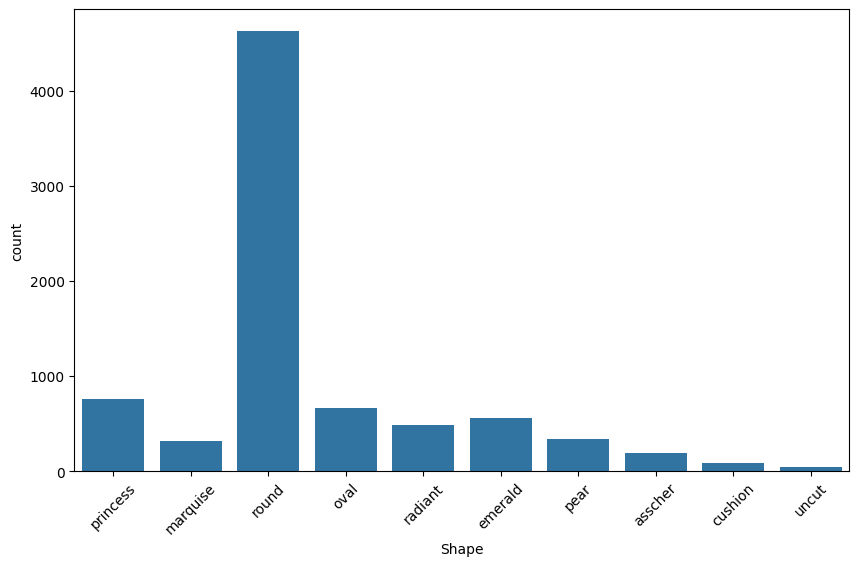

In [ ]:
print("Countplot of Shape: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Shape')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the distribution of 'Shape' including profit metrics
df_dist_Shape = df_training.groupby('Shape', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Shape = df_dist_Shape.reset_index()

# Rename columns for clarity
df_dist_Shape.columns = ['Shape', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                         'Mean_Retail', 'Max_Retail', 'Min_Retail',
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Shape.sort_values(by='Unique_IDs', ascending=False))

,Shape,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
8,round,4628,14989.029818,1087785,405,21417.489196,1675190,75,6428.459378,587405,-296215
6,princess,754,14004.051724,302465,430,19777.294430,465330,135,5773.242706,162865,-39960
4,oval,665,15410.007519,423195,595,23422.616541,889985,130,8012.609023,467855,-57555
2,emerald,554,15483.691336,681120,615,22324.945848,1047880,215,6841.254513,366760,-51325
7,radiant,481,13568.700624,233785,570,19318.232848,306970,155,5749.532225,106825,-32430
5,pear,336,17361.175595,428080,615,25010.357143,658580,360,7649.181548,230500,-28775
3,marquise,313,16235.127796,363920,515,23958.083067,540850,270,7722.955272,178805,-76020
0,asscher,194,19542.912371,783180,655,22019.484536,448270,290,2476.572165,69180,-673680
1,cushion,87,13269.022989,178980,715,15322.471264,102325,440,2053.448276,35815,-145630
9,uncut,38,6868.684211,49365,395,6774.605263,49365,45,-94.078947,615,-1200


Key findings:
1. Oval, marquise, pear, emrald generally has higher average profits
2. The uncut diamonds has low profitability
3. Rounds are the most popular diamonds with good average profits. But they also have extreme values on profits and losses.

### Symmetry - The quality of the symmetry of the diamond

In [ ]:
# Check number of unique shape values
unique_symmetry_counts =  df_training['Symmetry'].nunique()
unique_symmetry =  df_training['Symmetry'].unique()
print("Number of symmetry: " + str(unique_symmetry_counts))
print("Unique symmetry", unique_symmetry)

Number of symmetry: 7
Unique symmetry ['Good' 'Very good' 'Excellent' ' ' 'Faint' 'Fair' 'Execllent']


In [ ]:
# Normalize the 'Symmetry' column by converting to lowercase and stripping any leading/trailing spaces
df_training['Symmetry'] = df_training['Symmetry'].str.lower().str.strip()

# Standardize specific values manually, ensuring all variations of "excellent" are combined
df_training['Symmetry'] = df_training['Symmetry'].replace({
    'execllent': 'excellent',  # Fix additional typo
    'excellent ': 'excellent',  # Handle any trailing spaces
    ' very good': 'very good',  # Fix leading space issue
    'good ': 'good',            # Fix any trailing spaces
    ' ': 'unknown',             # Handle any blanks or spaces-only
    'very good': 'very good',   # Maintain 'very good'
    'good': 'good',             # Maintain 'good'
    'fair': 'fair',             # Maintain 'fair'
    'faint': 'faint'            # Maintain 'faint'
})

# Check the unique symmetry values after standardization
unique_symmetry_counts = df_training['Symmetry'].nunique()
unique_symmetry = df_training['Symmetry'].unique()

print(f"Number of unique symmetry values after normalization: {unique_symmetry_counts}")
print("Unique symmetry after normalization:", unique_symmetry)



Number of unique symmetry values after normalization: 6
Unique symmetry after normalization: ['good' 'very good' 'excellent' '' 'faint' 'fair']


Countplot of Symmetry: 


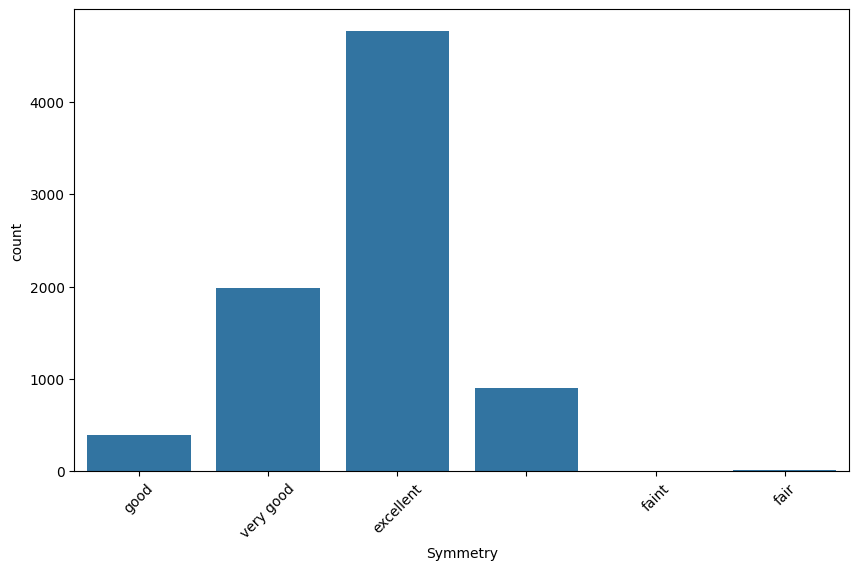

In [ ]:
print("Countplot of Symmetry: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Symmetry')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the number of missing values in the 'Symmetry' column for training dataset
missing_values_Symmetry_train = df_training['Symmetry'].isnull().sum()
print(f"Number of missing values in 'Symmetry' (Training Dataset): {missing_values_Symmetry_train}")

# Check the number of missing values in the 'Shape' column for offers dataset
missing_values_Shape_offers = df_offers['Shape'].isnull().sum()
print(f"Number of missing values in 'Shape' (Offers Dataset): {missing_values_Shape_offers}")

Number of missing values in 'Symmetry' (Training Dataset): 0
Number of missing values in 'Shape' (Offers Dataset): 0


In [ ]:
# Check the distribution of 'Symmetry' including profit metrics
df_dist_Symmetry = df_training.groupby('Symmetry', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Symmetry = df_dist_Symmetry.reset_index()

# Rename columns for clarity
df_dist_Symmetry.columns = ['Symmetry', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                            'Mean_Retail', 'Max_Retail', 'Min_Retail',
                            'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Symmetry.sort_values(by='Unique_IDs', ascending=False))

,Symmetry,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
1,excellent,4760,19443.930672,1087785,500,27562.922269,1675190,45,8118.991597,587405,-673680
5,very good,1980,8544.482323,367795,395,12376.378788,574100,95,3831.896465,206305,-25350
0,,899,9443.726363,346630,455,13785.289210,531035,120,4341.562848,184405,-17275
4,good,392,8529.056122,263975,430,12217.206633,398555,225,3688.150510,134580,-26825
3,fair,16,5874.375000,29970,405,8768.437500,49300,660,2894.062500,19330,-6615
2,faint,3,1221.666667,1875,800,1941.666667,3100,1110,720.000000,1225,310


Key findings:
1. The excellent and very good diamonds in symmetry are the most popular ones with higher profits, indicating the importance of symmetry in profits. They also have higher variability in profits due to their large sizes.

### Table - The table percentage of the diamond

In [ ]:
# Check number of unique table values
unique_table_counts =  df_training['Table'].nunique()
unique_table =  df_training['Table'].unique()
print("Number of table: " + str(unique_table_counts))
print("Unique table", unique_table)

Number of table: 22
Unique table [nan 57. 58. 64. 59. 55. 56. 61. 60. 62. 54. 63. 65. 53. 66. 68. 52.  0.
 67. 51. 46. 50. 69.]


Countplot of Table: 


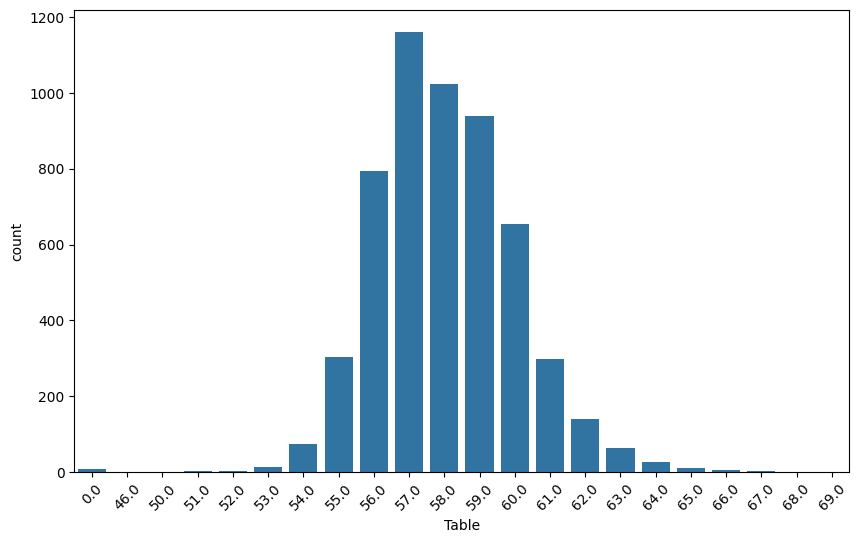

In [ ]:
print("Countplot of Table: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Table')
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig = px.box(df_training, 'Table', title='Box Plot of Table')
fig.show()

In [ ]:
# Check the number of missing values in the 'Table' column for training dataset
missing_values_table_train = df_training['Table'].isnull().sum()
print(f"Number of missing values in 'Table' (Training Dataset): {missing_values_table_train}")

# Check the number of missing values in the 'Table' column for offers dataset
missing_values_table_offers = df_offers['Table'].isnull().sum()
print(f"Number of missing values in 'Table' (Offers Dataset): {missing_values_table_offers}")

Number of missing values in 'Table' (Training Dataset): 2531
Number of missing values in 'Table' (Offers Dataset): 856


In [ ]:
# Check for ids with missing Table in the training dataset
df_training_missing_Table = df_training[df_training['Table'].isnull()]

# Display the first few rows, selected columns, and shape of the training dataset with missing Table
print("Training Dataset - Missing Table:")
display(df_training_missing_Table.head())
display(df_training_missing_Table[['id', 'Table']].head())
print("Shape:", df_training_missing_Table.shape)

# List of ids with missing Table in the training dataset
list_id_missing_Table_train = df_training_missing_Table['id'].tolist()
print("Number of IDs with Missing Table in Training Dataset:", len(list_id_missing_Table_train))

# Check for ids with missing Table in the offers dataset
df_offers_missing_Table = df_offers[df_offers['Table'].isnull()]

# Display the first few rows, selected columns, and shape of the offers dataset with missing Table
print("\nOffers Dataset - Missing Table:")
display(df_offers_missing_Table.head())
display(df_offers_missing_Table[['id', 'Table']].head())
print("Shape:", df_offers_missing_Table.shape)

# List of ids with missing Table in the offers dataset
list_id_missing_Table_offers = df_offers_missing_Table['id'].tolist()
print("Number of IDs with Missing Table in Offers Dataset:", len(list_id_missing_Table_offers))


Training Dataset - Missing Table:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,...,Vendor,Price,Retail,LogPrice,LogRetail,Profit,Valid_Measurements,Length,Width,Depth_Measurement
0,1,0.41,Unknown,SI1,L,Missing,65.400000,False,4.65x4.62x3.03,Very good,...,1,430,850,6.063785,6.745236,420,True,4.65,4.62,3.03
1,2,0.42,AGSL,SI2,L,Missing,61.700000,False,4.85x4.79x2.98,Excellent,...,1,560,920,6.327937,6.824374,360,True,4.85,4.79,2.98
10,11,0.40,AGSL,VS2,L,Missing,62.900000,False,4.74x4.71x2.97,Excellent,...,1,590,975,6.380123,6.882437,385,True,4.74,4.71,2.97
12,13,0.41,AGSL,SI2,K,Missing,63.600000,False,4.76x4.73x2.94,Excellent,...,1,595,970,6.388561,6.877296,375,True,4.76,4.73,2.94
20,21,0.42,AGSL,VS2,K,Missing,61.733333,False,4.81x4.79x2.99,Excellent,...,1,610,625,6.413459,6.437752,15,True,4.81,4.79,2.99


,id,Table
0,1,NaN
1,2,NaN
10,11,NaN
12,13,NaN
20,21,NaN


Shape: (2531, 24)
Number of IDs with Missing Table in Training Dataset: 2531

Offers Dataset - Missing Table:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Valid_Measurements,Length,Width,Depth_Measurement
4,8055,0.40,AGSL,VS2,L,Missing,64.300000,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN,True,4.67,4.62,2.99
7,8058,0.42,AGSL,VVS2,M,Missing,61.733333,False,4.81x4.79x2.89,Very good,Russia,Round,Very good,NaN,1,NaN,True,4.81,4.79,2.89
10,8061,0.40,AGSL,VS2,K,Missing,63.100000,False,4.68x4.66x2.95,Very good,DR Congo,Emerald,Excellent,NaN,1,NaN,True,4.68,4.66,2.95
16,8067,0.43,AGSL,SI1,K,Missing,61.700000,False,4.82x4.81x2.97,Excellent,Russia,Round,Very good,NaN,1,NaN,True,4.82,4.81,2.97
17,8068,0.42,GemEx,SI1,K,Missing,61.800000,False,4.83x4.8x2.98,Excellent,Russia,Round,Excellent,NaN,1,NaN,True,4.83,4.80,2.98


,id,Table
4,8055,NaN
7,8058,NaN
10,8061,NaN
16,8067,NaN
17,8068,NaN


Shape: (856, 20)
Number of IDs with Missing Table in Offers Dataset: 856


In [ ]:
# Fill missing values for Table in the training dataset
df_training['Table'] = df_training_imputed['Table']

# Display the first few rows and the shape of Table in the training dataset
print("\nTraining Dataset - Table After Imputation:")
display(df_training[df_training.id.isin(list_id_missing_Table_train)][['id', 'Table']].head())
print("Shape of Training Dataset with Missing Table After Imputation:", df_training[df_training.id.isin(list_id_missing_Table_train)].shape)

# Fill missing values for Table in the offers dataset
df_offers['Table'] = df_offers_imputed['Table']

# Display the first few rows and the shape of Table in the offers dataset
print("\nOffers Dataset - Table After Imputation:")
display(df_offers[df_offers.id.isin(list_id_missing_Table_offers)][['id', 'Table']].head())
print("Shape of Offers Dataset with Missing Table After Imputation:", df_offers[df_offers.id.isin(list_id_missing_Table_offers)].shape)



Training Dataset - Table After Imputation:


,id,Table
0,1,56.666667
1,2,57.666667
10,11,57.000000
12,13,58.000000
20,21,58.000000


Shape of Training Dataset with Missing Table After Imputation: (2531, 24)

Offers Dataset - Table After Imputation:


,id,Table
4,8055,57.000000
7,8058,58.000000
10,8061,57.666667
16,8067,57.333333
17,8068,57.666667


Shape of Offers Dataset with Missing Table After Imputation: (856, 20)


In [ ]:
# Calculate and display the correlations
table_price_corr = round(df_training['Table'].corr(df_training['Price']), 4)
table_retail_corr = round(df_training['Table'].corr(df_training['Retail']), 4)
table_profit_corr = round(df_training['Table'].corr(df_training['Profit']), 4)

print(f"Correlation between Table and Price: {table_price_corr}")
print(f"Correlation between Table and Retail: {table_retail_corr}")
print(f"Correlation between Table and Profit: {table_profit_corr}")

Correlation between Table and Price: 0.0072
Correlation between Table and Retail: 0.0049
Correlation between Table and Profit: -0.0002


Key findings:
1. The correlation is very low, indicating that table has little impact on pricing and profitability

#### Vendor - The vendor selling the diamond

In [ ]:
# Check number of unique vendor values
unique_vendor_counts =  df_training['Vendor'].nunique()
unique_vendor =  df_training['Vendor'].unique()
print("Number of vendors: " + str(unique_vendor_counts))
print("Unique vendor", unique_vendor)

Number of vendors: 4
Unique vendor [1 2 3 4]


In [ ]:
# Change data type of 'Vendor' column to string
df_training['Vendor'] = df_training['Vendor'].astype(str)

Countplot of Vendor: 


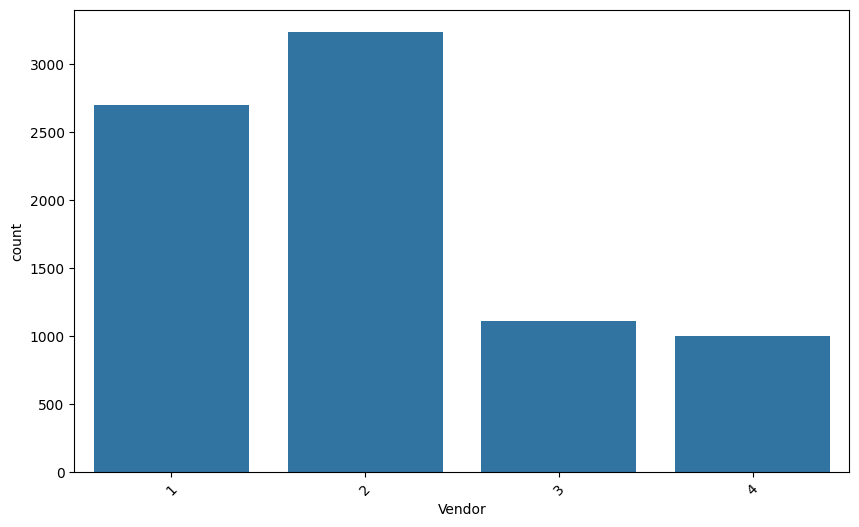

In [ ]:
print("Countplot of Vendor: ")
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(data=df_training, x='Vendor')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the number of missing values in the 'Vendor' column for training dataset
missing_values_vendor_train = df_training['Vendor'].isnull().sum()
print(f"Number of missing values in 'Vendor' (Training Dataset): {missing_values_vendor_train}")

# Check the number of missing values in the 'Vendor' column for offers dataset
missing_values_vendor_offers = df_offers['Vendor'].isnull().sum()
print(f"Number of missing values in 'Vendor' (Offers Dataset): {missing_values_vendor_offers}")


Number of missing values in 'Vendor' (Training Dataset): 0
Number of missing values in 'Vendor' (Offers Dataset): 0


In [ ]:
# Check the distribution of 'Vendor' including profit metrics
df_dist_Vendor = df_training.groupby('Vendor', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Vendor = df_dist_Vendor.reset_index()

# Rename columns for clarity
df_dist_Vendor.columns = ['Vendor', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                         'Mean_Retail', 'Max_Retail', 'Min_Retail',
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Vendor.sort_values(by='Unique_IDs', ascending=False))

,Vendor,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
1,2,3241,27123.471151,1087785,600,39124.959889,1675190,370,12001.488738,587405,-673680
0,1,2702,2363.480755,9480,395,3604.009993,15805,45,1240.529238,7695,-5800
2,3,1106,10278.096745,28360,2560,15292.400542,46310,340,5014.303797,18600,-23545
3,4,1001,15725.544456,44890,3775,19557.997003,54730,720,3832.452547,22935,-39960


Key findings:
1. Vendor also significantly impacts profitability and pricing. For example, vendor 2 trades diamonds with higher prices and gets higher profits in general. Vendor 1 trades diamonds with lower price and profits. This could help us identify competitive advantages among vendors.

# Check Categorial Vriables

In [ ]:
# Check data types for training dataset
print("Training Dataset:")
display(df_training.info())

# Check data types for offers dataset
print("\nOffers Dataset:")
display(df_offers.info())

Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8050 non-null   int64  
 1   Carats                  8050 non-null   float64
 2   Cert                    8050 non-null   object 
 3   Clarity                 8050 non-null   object 
 4   Color                   8050 non-null   object 
 5   Cut                     8050 non-null   object 
 6   Depth                   8050 non-null   float64
 7   Known_Conflict_Diamond  8050 non-null   bool   
 8   Measurements            8050 non-null   object 
 9   Polish                  8050 non-null   object 
 10  Regions                 8050 non-null   object 
 11  Shape                   8050 non-null   object 
 12  Symmetry                8050 non-null   object 
 13  Table                   8050 non-null   float64
 14  Vendor                

None


Offers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2683 non-null   int64  
 1   Carats                  2683 non-null   float64
 2   Cert                    2683 non-null   object 
 3   Clarity                 2683 non-null   object 
 4   Color                   2683 non-null   object 
 5   Cut                     2683 non-null   object 
 6   Depth                   2683 non-null   float64
 7   Known_Conflict_Diamond  2683 non-null   bool   
 8   Measurements            2683 non-null   object 
 9   Polish                  2683 non-null   object 
 10  Regions                 2683 non-null   object 
 11  Shape                   2683 non-null   object 
 12  Symmetry                2683 non-null   object 
 13  Table                   2683 non-null   float64
 14  Vendor                 

None

In [ ]:
# Select Vars
del df_training['Measurements'], df_training['Valid_Measurements']

In [ ]:
# Apply get_dummies to the training and test datasets
df_train_dummies = pd.get_dummies(df_training)
df_offers_dummies = pd.get_dummies(df_offers)

# Align the test dataset to the columns of the training dataset, filling missing columns with 0
df_offers_dummies = df_offers_dummies.reindex(columns=df_train_dummies.columns, fill_value=0)

# Display the results for the training dataset
display(df_train_dummies.head())
print("Training DataFrame shape:", df_train_dummies.shape)

# Display the results for the test dataset (assuming it's df_offers_dummies as per the provided code)
display(df_offers_dummies.head())
print("Test DataFrame shape:", df_offers_dummies.shape)

,id,Carats,Depth,Known_Conflict_Diamond,Table,Price,Retail,LogPrice,LogRetail,Profit,...,Symmetry_,Symmetry_excellent,Symmetry_faint,Symmetry_fair,Symmetry_good,Symmetry_very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,1,0.41,65.4,False,56.666667,430,850,6.063785,6.745236,420,...,False,False,False,False,True,False,True,False,False,False
1,2,0.42,61.7,False,57.666667,560,920,6.327937,6.824374,360,...,False,False,False,False,False,True,True,False,False,False
2,3,0.40,64.0,False,57.000000,560,575,6.327937,6.354370,15,...,False,True,False,False,False,False,True,False,False,False
3,4,0.41,62.7,False,58.000000,560,825,6.327937,6.715383,265,...,False,False,False,False,False,True,True,False,False,False
4,5,0.40,63.0,False,58.000000,580,890,6.363028,6.791221,310,...,False,False,False,False,False,True,True,False,False,False


Training DataFrame shape: (8050, 100)


,id,Carats,Depth,Known_Conflict_Diamond,Table,Price,Retail,LogPrice,LogRetail,Profit,...,Symmetry_,Symmetry_excellent,Symmetry_faint,Symmetry_fair,Symmetry_good,Symmetry_very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,8051,0.42,62.7,False,57.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8052,0.40,63.8,False,59.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8053,0.41,62.2,True,58.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8054,0.40,64.2,False,58.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8055,0.40,64.3,False,57.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Test DataFrame shape: (2683, 100)


# Standardization

In [ ]:
# Identify continuous variables in the training dataset
list_continuous_vars = df_training.select_dtypes(include=[np.number]).columns.tolist()
excluded_vars = ['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Vendor', 'Profit']
list_continuous_vars = [var for var in list_continuous_vars if var not in excluded_vars]

# Display the list of continuous variables
print("List of Continuous Variables:")
print(f"Number of continuous variables: {len(list_continuous_vars)}")
print(list_continuous_vars)

List of Continuous Variables:
Number of continuous variables: 6
['Carats', 'Depth', 'Table', 'Length', 'Width', 'Depth_Measurement']


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize continuous variables in training dataset
df_training_scaled = scaler.fit_transform(df_training[list_continuous_vars])

# Create a new DataFrame with standardized values for training
df_training_scaled = pd.DataFrame(df_training_scaled, columns=list_continuous_vars, index=df_training.index)

display(df_training_scaled.head())
print("Training DataFrame (scaled) shape:", df_training_scaled.shape)

# Standardize continuous variables in offers dataset (assuming similar structure to training)
df_offers_scaled = scaler.transform(df_offers[list_continuous_vars])

# Create a new DataFrame with standardized values for offers
df_offers_scaled = pd.DataFrame(df_offers_scaled, columns=list_continuous_vars, index=df_offers.index)

display(df_offers_scaled.head())
print("Offers DataFrame (scaled) shape:", df_offers_scaled.shape)

# Merge the scaled values back into the original DataFrames (assuming they have been aligned or processed appropriately)
df_training_dummy_scaled = pd.concat([df_train_dummies.drop(columns=list_continuous_vars), df_training_scaled], axis=1)
df_offers_dummy_scaled = pd.concat([df_offers_dummies.drop(columns=list_continuous_vars), df_offers_scaled], axis=1)

# Display the results
display(df_training_dummy_scaled.head())
print("Training DataFrame (merged) shape:", df_training_dummy_scaled.shape)

display(df_offers_dummy_scaled.head())
print("Offers DataFrame (merged) shape:", df_offers_dummy_scaled.shape)

,Carats,Depth,Table,Length,Width,Depth_Measurement
0,-0.956724,1.792552,-0.477243,-1.479575,-1.497445,-1.305272
1,-0.945545,-0.030865,-0.092652,-1.331469,-1.372832,-1.365727
2,-0.967903,1.102611,-0.349046,-1.472170,-1.490115,-1.377818
3,-0.956724,0.461951,0.035545,-1.435143,-1.446134,-1.402000
4,-0.967903,0.609795,0.035545,-1.435143,-1.453464,-1.389909


Training DataFrame (scaled) shape: (8050, 6)


,Carats,Depth,Table,Length,Width,Depth_Measurement
0,-0.945545,0.461951,-0.349046,-1.361090,-1.380162,-1.329454
1,-0.967903,1.004048,0.420135,-1.486980,-1.504775,-1.402000
2,-0.956724,0.215543,0.035545,-1.398117,-1.409483,-1.402000
3,-0.967903,1.201174,0.035545,-1.494385,-1.519436,-1.389909
4,-0.967903,1.250455,-0.349046,-1.464764,-1.497445,-1.353636


Offers DataFrame (scaled) shape: (2683, 6)


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,...,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Length,Width,Depth_Measurement
0,1,False,430,850,6.063785,6.745236,420,False,False,True,...,True,False,False,False,-0.956724,1.792552,-0.477243,-1.479575,-1.497445,-1.305272
1,2,False,560,920,6.327937,6.824374,360,True,False,False,...,True,False,False,False,-0.945545,-0.030865,-0.092652,-1.331469,-1.372832,-1.365727
2,3,False,560,575,6.327937,6.354370,15,True,False,False,...,True,False,False,False,-0.967903,1.102611,-0.349046,-1.472170,-1.490115,-1.377818
3,4,False,560,825,6.327937,6.715383,265,True,False,False,...,True,False,False,False,-0.956724,0.461951,0.035545,-1.435143,-1.446134,-1.402000
4,5,False,580,890,6.363028,6.791221,310,True,False,False,...,True,False,False,False,-0.967903,0.609795,0.035545,-1.435143,-1.453464,-1.389909


Training DataFrame (merged) shape: (8050, 100)


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,...,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Length,Width,Depth_Measurement
0,8051,False,0,0,0,0,0,True,False,False,...,0,0,0,0,-0.945545,0.461951,-0.349046,-1.361090,-1.380162,-1.329454
1,8052,False,0,0,0,0,0,False,True,False,...,0,0,0,0,-0.967903,1.004048,0.420135,-1.486980,-1.504775,-1.402000
2,8053,True,0,0,0,0,0,True,False,False,...,0,0,0,0,-0.956724,0.215543,0.035545,-1.398117,-1.409483,-1.402000
3,8054,False,0,0,0,0,0,True,False,False,...,0,0,0,0,-0.967903,1.201174,0.035545,-1.494385,-1.519436,-1.389909
4,8055,False,0,0,0,0,0,True,False,False,...,0,0,0,0,-0.967903,1.250455,-0.349046,-1.464764,-1.497445,-1.353636


Offers DataFrame (merged) shape: (2683, 100)


# Multicolinearity Issue Checking

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_training_dummy_scaled[list_continuous_vars].corr()

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = list_continuous_vars
vif_data["VIF"] = [variance_inflation_factor(df_training_dummy_scaled[list_continuous_vars].values, i) for i in range(len(list_continuous_vars))]

print("\nVariance Inflation Factors:")
display(vif_data)


Variance Inflation Factors:


,Variable,VIF
0,Carats,10.281001
1,Depth,1.721541
2,Table,1.395951
3,Length,781.592104
4,Width,729.877667
5,Depth_Measurement,119.502308


In [ ]:
# Function to calculate VIF
dict_removed_var = {}
def calculate_vif(df, excluded_vars=[]):
    # Select numeric columns excluding specific ones
    numeric_df = df.select_dtypes(include=[float])
    specific_exclusions = ['Price', 'Profit', 'Retail', 'LogPrice', 'LogRetail']
    variables_to_include = [var for var in numeric_df.columns if var not in specific_exclusions + excluded_vars]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables_to_include
    vif_data["VIF"] = [variance_inflation_factor(numeric_df[variables_to_include].values, i) for i in range(len(variables_to_include))]
    return vif_data

# Initialize variables and perform VIF calculation
excluded_vars = []
iteration = 0
vif_data = calculate_vif(df_training_dummy_scaled, excluded_vars)

# Iteratively remove variables with high VIF and recalculate
while vif_data['VIF'].max() > 10:
    max_vif_var = vif_data.sort_values('VIF', ascending=False).iloc[0]['Variable']
    max_vif_value = vif_data.sort_values('VIF', ascending=False).iloc[0]['VIF']
    print(f"\nIteration {iteration}: Removed variable '{max_vif_var}' with VIF {max_vif_value}")
    excluded_vars.append(max_vif_var)
    vif_data = calculate_vif(df_training_dummy_scaled, excluded_vars)
    dict_removed_var[max_vif_var] = vif_data
    iteration += 1

# Display the final VIF dataframe after iterations
display(vif_data)


Iteration 0: Removed variable 'Length' with VIF 781.5921044640093

Iteration 1: Removed variable 'Width' with VIF 121.54956482783219


,Variable,VIF
0,Carats,9.288356
1,Depth,1.084882
2,Table,1.074427
3,Depth_Measurement,9.227172


In [ ]:
# Display the dictionary with VIF data after each removal
for var, vif_df in dict_removed_var.items():
    print(f"\nVIF after removing {var}:")
    display(vif_df)


VIF after removing Length:


,Variable,VIF
0,Carats,9.950047
1,Depth,1.697723
2,Table,1.373973
3,Width,121.549565
4,Depth_Measurement,112.062411



VIF after removing Width:


,Variable,VIF
0,Carats,9.288356
1,Depth,1.084882
2,Table,1.074427
3,Depth_Measurement,9.227172


In [ ]:
# Ensure 'enrollment_id' and 'dropout_flg' are not in the list of excluded variables
list_excluded_vars_final = list(set(excluded_vars))

# Drop the excluded variables from the train and test datasets
df_training_dummy_scaled = df_training_dummy_scaled.drop(columns=list_excluded_vars_final)
df_offers_dummy_scaled = df_offers_dummy_scaled.drop(columns=list_excluded_vars_final)

# Display the results
print("Training DataFrame:")
display(df_training_dummy_scaled.head())
print("Training DataFrame shape:", df_training_dummy_scaled.shape)
print()
print("Offers DataFrame:")
display(df_offers_dummy_scaled.head())
print("Offers DataFrame shape:", df_offers_dummy_scaled.shape)

Training DataFrame:


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,...,Symmetry_good,Symmetry_very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Depth_Measurement
0,1,False,430,850,6.063785,6.745236,420,False,False,True,...,True,False,True,False,False,False,-0.956724,1.792552,-0.477243,-1.305272
1,2,False,560,920,6.327937,6.824374,360,True,False,False,...,False,True,True,False,False,False,-0.945545,-0.030865,-0.092652,-1.365727
2,3,False,560,575,6.327937,6.354370,15,True,False,False,...,False,False,True,False,False,False,-0.967903,1.102611,-0.349046,-1.377818
3,4,False,560,825,6.327937,6.715383,265,True,False,False,...,False,True,True,False,False,False,-0.956724,0.461951,0.035545,-1.402000
4,5,False,580,890,6.363028,6.791221,310,True,False,False,...,False,True,True,False,False,False,-0.967903,0.609795,0.035545,-1.389909


Training DataFrame shape: (8050, 98)

Offers DataFrame:


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,...,Symmetry_good,Symmetry_very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Depth_Measurement
0,8051,False,0,0,0,0,0,True,False,False,...,0,0,0,0,0,0,-0.945545,0.461951,-0.349046,-1.329454
1,8052,False,0,0,0,0,0,False,True,False,...,0,0,0,0,0,0,-0.967903,1.004048,0.420135,-1.402000
2,8053,True,0,0,0,0,0,True,False,False,...,0,0,0,0,0,0,-0.956724,0.215543,0.035545,-1.402000
3,8054,False,0,0,0,0,0,True,False,False,...,0,0,0,0,0,0,-0.967903,1.201174,0.035545,-1.389909
4,8055,False,0,0,0,0,0,True,False,False,...,0,0,0,0,0,0,-0.967903,1.250455,-0.349046,-1.353636


Offers DataFrame shape: (2683, 98)


# Build Model

## Retail Prediction

In [ ]:
# Prepare the features and label DataFrames for train-test split
features_logretail = df_training_dummy_scaled.drop(columns=['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Profit'])
label_logretail = df_training_dummy_scaled['LogRetail']

# Perform the train-test split
features_train_logretail, features_test_logretail, labels_train_logretail, labels_test_logretail = train_test_split(
    features_logretail, label_logretail, test_size=0.20, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", features_train_logretail.shape)
print("Test features shape:", features_test_logretail.shape)
print("Training labels shape:", labels_train_logretail.shape)
print("Test labels shape:", labels_test_logretail.shape)

Training features shape: (6440, 92)
Test features shape: (1610, 92)
Training labels shape: (6440,)
Test labels shape: (1610,)


In [ ]:
# # Define a function to evaluate the models
# def evaluate(model, X, y):
#     predictions = model.predict(X)
#     r2 = r2_score(y, predictions)
#     mae = mean_absolute_error(y, predictions)
#     return r2, mae

# # Define the models
# models = {
#     'CatBoost Regressor': CatBoostRegressor(random_state=42),
#     'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
#     'XGBoost Regressor': XGBRegressor(random_state=42)
# }

# test_scores_logretail = []
# model_list_logretail = []

# # Train and evaluate each model
# for model_name, model in models.items():
#     model.fit(features_train_logretail, labels_train_logretail)
#     test_r2, test_mae = evaluate(model, features_test_logretail, labels_test_logretail)
#     test_scores_logretail.append((round(test_r2, 4), round(test_mae, 4)))
#     model_list_logretail.append(model_name)

# # Create a DataFrame to store the results
# df_result_logretail = pd.DataFrame({
#     'Test R2': [score[0] for score in test_scores_logretail],
#     'Test MAE': [score[1] for score in test_scores_logretail]
# }, index=model_list_logretail)

# # Display the results
# df_result_logretail

# Define a function to evaluate the models
def evaluate(model, X, y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return r2, mae

# Define the models
models = {
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(verbose=0, random_state=42)  # Set verbose=0 to suppress logs
}

test_scores_logretail = []
model_list_logretail = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(features_train_logretail, labels_train_logretail)
    test_r2, test_mae = evaluate(model, features_test_logretail, labels_test_logretail)
    test_scores_logretail.append((round(test_r2, 4), round(test_mae, 4)))
    model_list_logretail.append(model_name)

# Create a DataFrame to store the results
df_result_logretail = pd.DataFrame({
    'Test R2': [score[0] for score in test_scores_logretail],
    'Test MAE': [score[1] for score in test_scores_logretail]
}, index=model_list_logretail)

# Display the results
df_result_logretail

,Test R2,Test MAE
KNN Regressor,0.8313,0.3618
Random Forest,0.9744,0.1418
XGBoost Regressor,0.9819,0.1233
CatBoost Regressor,0.9848,0.1119


The CatBoost Regressor is the best model among the three, as it has the highest Test R2 value (0.9848) and the lowest Test MAE value (0.1119). This indicates that the CatBoost Regressor has the best fit and the lowest prediction error on the test set.

In [ ]:
# Define the parameter grid for CatBoostRegressor
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [200, 500, 1000]
}

# Create a base model
catboost_regressor = CatBoostRegressor(verbose=0, random_state=42)

# Instantiate the grid search model
grid_search_logretail = GridSearchCV(estimator=catboost_regressor, param_grid=param_grid,
                                     cv=3, n_jobs=-1, verbose=0)

# Fit the grid search to the data and identify best hyperparameters
grid_search_logretail.fit(features_train_logretail, labels_train_logretail)
best_params_logretail = grid_search_logretail.best_params_

# Display the best hyperparameters
print("Best hyperparameters for CatBoost Regressor (LogRetail):", best_params_logretail)

# Build the final model with the best hyperparameters and evaluate its performance
best_grid_logretail = grid_search_logretail.best_estimator_
grid_accuracy_logretail = evaluate(best_grid_logretail, features_test_logretail, labels_test_logretail)

# Print the evaluation metrics
print("Grid Search LogRetail Model Evaluation:", grid_accuracy_logretail)

Best hyperparameters for CatBoost Regressor (LogRetail): {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.03}
Grid Search LogRetail Model Evaluation: (0.9845577288716856, 0.1123465463552973)


In [ ]:
# Fit final model with best hyperparameters for LogRetail
catboost_final_logretail = CatBoostRegressor(
    depth=6,
    iterations=1000,
    l2_leaf_reg=1,
    learning_rate=0.03,
    random_state=42,
    verbose=0  # Suppress logs for cleaner output
)

# Train the CatBoost model on the training data
catboost_final_logretail.fit(features_train_logretail, labels_train_logretail)

# Predict results on training and test data
catboost_predict_result_final_train_logretail = catboost_final_logretail.predict(features_train_logretail)
catboost_predict_result_final_test_logretail = catboost_final_logretail.predict(features_test_logretail)

# Calculate R2 scores
r2_train_logretail = r2_score(labels_train_logretail, catboost_predict_result_final_train_logretail)
r2_test_logretail = r2_score(labels_test_logretail, catboost_predict_result_final_test_logretail)

# Print R2 scores
print("Final CatBoost Regressor training R2-score =", round(r2_train_logretail, 3))
print("Final CatBoost Regressor validation R2-score =", round(r2_test_logretail, 3))

Final CatBoost Regressor training R2-score = 0.989
Final CatBoost Regressor validation R2-score = 0.985


## Price Prediction

In [ ]:
# Prepare the features and label DataFrames for train-test split
features_logprice = df_training_dummy_scaled.drop(columns=['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Profit'])
label_logprice = df_training_dummy_scaled['LogPrice']

# Perform the train-test split
features_train_logprice, features_test_logprice, labels_train_logprice, labels_test_logprice = train_test_split(
    features_logprice, label_logprice, test_size=0.20, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", features_train_logprice.shape)
print("Test features shape:", features_test_logprice.shape)
print("Training labels shape:", labels_train_logprice.shape)
print("Test labels shape:", labels_test_logprice.shape)

Training features shape: (6440, 92)
Test features shape: (1610, 92)
Training labels shape: (6440,)
Test labels shape: (1610,)


In [ ]:
# Define a function to evaluate the models
def evaluate(model, X, y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return r2, mae

# Define the models
models = {
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(random_state=42, verbose=0)  # Added CatBoost
}

test_scores_logprice = []
model_list_logprice = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(features_train_logprice, labels_train_logprice)
    test_r2, test_mae = evaluate(model, features_test_logprice, labels_test_logprice)
    test_scores_logprice.append((round(test_r2, 4), round(test_mae, 4)))
    model_list_logprice.append(model_name)

# Create a DataFrame to store the results
df_result_logprice = pd.DataFrame({
    'Test R2': [score[0] for score in test_scores_logprice],
    'Test MAE': [score[1] for score in test_scores_logprice]
}, index=model_list_logprice)

# Display the results
df_result_logprice

,Test R2,Test MAE
KNN Regressor,0.9139,0.2830
Random Forest,0.9820,0.1097
XGBoost Regressor,0.9880,0.0922
CatBoost Regressor,0.9902,0.0840


In [ ]:
# Define the parameter grid for CatBoostRegressor
param_grid_logprice = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [200, 500, 1000]
}

# Create a base model
catboost_regressor_logprice = CatBoostRegressor(random_state=42, verbose=0)

# Instantiate the grid search model
grid_search_logprice = GridSearchCV(estimator=catboost_regressor_logprice, param_grid=param_grid_logprice,
                                    cv=3, n_jobs=-1, verbose=0)

# Fit the grid search to the data and identify best hyperparameters
grid_search_logprice.fit(features_train_logprice, labels_train_logprice)
best_params_logprice = grid_search_logprice.best_params_

# Display the best hyperparameters
print("Best hyperparameters for CatBoost Regressor (LogPrice):", best_params_logprice)

# Build the final model with the best hyperparameters and evaluate its performance
best_grid_logprice = grid_search_logprice.best_estimator_
grid_accuracy_logprice = evaluate(best_grid_logprice, features_test_logprice, labels_test_logprice)

# Print the evaluation metrics
print("Grid Search LogPrice Model Evaluation:", grid_accuracy_logprice)


Best hyperparameters for CatBoost Regressor (LogPrice): {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Grid Search LogPrice Model Evaluation: (0.9902928157881372, 0.08221386340385432)


In [ ]:
# Fit final model with best hyperparameters for LogPrice
catboost_final_logprice = CatBoostRegressor(
    depth=6,
    iterations=1000,
    l2_leaf_reg=1,
    learning_rate=0.1,
    random_state=42,
    verbose=0  # Suppress logs for cleaner output
)

# Train the CatBoost model on the training data
catboost_final_logprice.fit(features_train_logprice, labels_train_logprice)

# Predict results on training and test data
catboost_predict_result_final_train_logprice = catboost_final_logprice.predict(features_train_logprice)
catboost_predict_result_final_test_logprice = catboost_final_logprice.predict(features_test_logprice)

# Calculate R2 scores
r2_train_logprice = r2_score(labels_train_logprice, catboost_predict_result_final_train_logprice)
r2_test_logprice = r2_score(labels_test_logprice, catboost_predict_result_final_test_logprice)

# Print R2 scores
print("Final CatBoost Regressor training R2-score =", round(r2_train_logprice, 3))
print("Final CatBoost Regressor validation R2-score =", round(r2_test_logprice, 3))


Final CatBoost Regressor training R2-score = 0.997
Final CatBoost Regressor validation R2-score = 0.99


# Predict in offers dataset

In [ ]:
# Ensure the columns used for training are used for predictions
features_columns = features_logretail.columns

# Apply the LogPrice prediction model to predict diamonds' LogPrice in the offers dataset
df_offers_dummy_scaled['log_price_predicted'] = catboost_final_logprice.predict(df_offers_dummy_scaled[features_columns])

# Apply the LogRetail prediction model to predict diamonds' LogRetail in the offers dataset
df_offers_dummy_scaled['log_retail_predicted'] = catboost_final_logretail.predict(df_offers_dummy_scaled[features_columns])

# Display the first few rows of the offers dataset with the predictions
display(df_offers_dummy_scaled[['id', 'log_price_predicted', 'log_retail_predicted']].head())

,id,log_price_predicted,log_retail_predicted
0,8051,6.370263,6.784981
1,8052,6.307991,6.686780
2,8053,6.289620,5.105109
3,8054,6.561174,6.832275
4,8055,6.305922,6.823950


In [ ]:
# Convert log predictions back to original scale
df_offers_dummy_scaled['price_predicted'] = np.exp(df_offers_dummy_scaled['log_price_predicted'])
df_offers_dummy_scaled['retail_predicted'] = np.exp(df_offers_dummy_scaled['log_retail_predicted'])

# Display the first few rows of the offers dataset with the predictions
display(df_offers_dummy_scaled[['id', 'price_predicted', 'retail_predicted']].head())

,id,price_predicted,retail_predicted
0,8051,584.211317,884.463521
1,8052,548.940816,801.736310
2,8053,538.948698,164.862070
3,8054,707.101419,927.297907
4,8055,547.806587,919.610673


In [ ]:
# Calculate the ROI of the diamonds in the offers dataset
df_offers_dummy_scaled['ROI'] = round((df_offers_dummy_scaled['retail_predicted'] - df_offers_dummy_scaled['price_predicted']) * 100 / df_offers_dummy_scaled['price_predicted'], 2)

# Display the first few rows of the offers dataset with the ROI
display(df_offers_dummy_scaled[['id', 'price_predicted', 'retail_predicted', 'ROI']].head(10))

,id,price_predicted,retail_predicted,ROI
0,8051,584.211317,884.463521,51.39
1,8052,548.940816,801.736310,46.05
2,8053,538.948698,164.862070,-69.41
3,8054,707.101419,927.297907,31.14
4,8055,547.806587,919.610673,67.87
5,8056,616.442418,1008.090905,63.53
6,8057,561.295085,901.629621,60.63
7,8058,655.447190,967.971756,47.68
8,8059,652.968199,1012.318238,55.03
9,8060,614.278078,960.726632,56.40


In [ ]:
# Reorder the offers dataset by the ROI value in descending order
df_offers_dummy_scaled = df_offers_dummy_scaled.sort_values(by='ROI', ascending=False).reset_index(drop=True)

# Display the first few rows of the reordered offers dataset
display(df_offers_dummy_scaled[['id', 'price_predicted', 'retail_predicted', 'ROI']].head())

,id,price_predicted,retail_predicted,ROI
0,10413,2146.281520,4219.306131,96.59
1,10717,1902.569176,3702.998214,94.63
2,10702,1879.341257,3612.888232,92.24
3,8867,7088.113187,13589.823156,91.73
4,9768,158173.338886,301244.623607,90.45


In [ ]:
# Calculate the offers value of each diamond and their running totals
df_offers_dummy_scaled['sum_value'] = df_offers_dummy_scaled['price_predicted'].cumsum()
df_offers_dummy_scaled['Offers'] = df_offers_dummy_scaled['price_predicted']

# Display the first few rows of the offers dataset with the cumulative sum values
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())


,id,price_predicted,sum_value,Offers
0,10413,2146.281520,2146.281520,2146.281520
1,10717,1902.569176,4048.850697,1902.569176
2,10702,1879.341257,5928.191954,1879.341257
3,8867,7088.113187,13016.305142,7088.113187
4,9768,158173.338886,171189.644028,158173.338886


In [ ]:
# Calculate the cumulative sum of predicted prices
df_offers_dummy_scaled['sum_value'] = df_offers_dummy_scaled['price_predicted'].cumsum()

# Calculate the offers value of each diamond based on the remaining budget
df_offers_dummy_scaled['Offers'] = np.where(df_offers_dummy_scaled['sum_value'] <= 5000000, df_offers_dummy_scaled['price_predicted'], 0)

# Calculate the remaining budget after selecting the offers
remaining_budget = 5000000 - df_offers_dummy_scaled[df_offers_dummy_scaled['sum_value'] <= 5000000]['sum_value'].max()

# Display the first few rows of the offers dataset with the offers and sum_value
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())

# Print the remaining budget
print("Remaining budget:", remaining_budget)

,id,price_predicted,sum_value,Offers
0,10413,2146.281520,2146.281520,2146.281520
1,10717,1902.569176,4048.850697,1902.569176
2,10702,1879.341257,5928.191954,1879.341257
3,8867,7088.113187,13016.305142,7088.113187
4,9768,158173.338886,171189.644028,158173.338886


Remaining budget: 1757.5407587038353


In [ ]:
# Get the number of unique diamonds bought
num_diamonds_bought = df_offers_dummy_scaled[df_offers_dummy_scaled['Offers'] > 0]['id'].nunique()

# Calculate the total number of diamonds
total_diamonds = df_offers_dummy_scaled['id'].nunique()

# Calculate the percentage of diamonds bought
pct_diamonds_bought = (num_diamonds_bought / total_diamonds) * 100

# Print the results
print(f"Number of diamonds bought: {num_diamonds_bought}")
print(f"Percentage of diamonds bought: {pct_diamonds_bought:.2f}%")


Number of diamonds bought: 693
Percentage of diamonds bought: 25.83%


In [ ]:
# Identify more diamonds to buy with the remaining budget
candidate = df_offers_dummy_scaled[df_offers_dummy_scaled['Offers'] == 0].copy()

for i, value in enumerate(candidate['price_predicted']):
    if (value <= remaining_budget) and (candidate['ROI'].iloc[i] > 0):
        df_offers_dummy_scaled.loc[candidate.index[i], 'Offers'] = candidate['price_predicted'].iloc[i]
        remaining_budget -= value

# Display the first few rows of the updated offers dataset
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())

# Print the remaining budget after additional selections
print("Remaining budget after additional selections:", remaining_budget)


,id,price_predicted,sum_value,Offers
0,10413,2146.281520,2146.281520,2146.281520
1,10717,1902.569176,4048.850697,1902.569176
2,10702,1879.341257,5928.191954,1879.341257
3,8867,7088.113187,13016.305142,7088.113187
4,9768,158173.338886,171189.644028,158173.338886


Remaining budget after additional selections: 267.74609472263114


In [ ]:
# Update the value of the Offers column
candidate_true = candidate[candidate['price_predicted'] <= remaining_budget]
diamond_id = candidate_true['id'].tolist()

for i, value in enumerate(df_offers_dummy_scaled['id']):
    if value in diamond_id:
        df_offers.at[i, 'Offers'] = df_offers_dummy_scaled.at[i, 'price_predicted']

# Display the first few rows of the updated offers dataset
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())

# Print the remaining budget after additional selections
print("Remaining budget after additional selections:", remaining_budget)


,id,price_predicted,sum_value,Offers
0,10413,2146.281520,2146.281520,2146.281520
1,10717,1902.569176,4048.850697,1902.569176
2,10702,1879.341257,5928.191954,1879.341257
3,8867,7088.113187,13016.305142,7088.113187
4,9768,158173.338886,171189.644028,158173.338886


Remaining budget after additional selections: 267.74609472263114


In [ ]:
# Load the original offers dataset
df_offers_final = pd.read_csv("offers.csv")

# Update the Offers column in the original offers dataset
for i, value1 in enumerate(df_offers_final['id']):
    for j, value2 in enumerate(df_offers_dummy_scaled['id']):
        if value1 == value2:
            df_offers_final.at[i, 'Offers'] = df_offers_dummy_scaled.at[j, 'Offers']

# Display the first few rows of the updated offers dataset
display(df_offers_final[['id', 'Offers']].head(10))


,id,Offers
0,8051,0.000000
1,8052,0.000000
2,8053,0.000000
3,8054,0.000000
4,8055,547.806587
5,8056,616.442418
6,8057,561.295085
7,8058,0.000000
8,8059,0.000000
9,8060,0.000000


In [ ]:
df_offers_final.to_csv('offers_submit.csv', index = False)

# Short Answer

In [ ]:
# Check the distribution of 'Vendor' including profit metrics
df_dist_Vendor = df_training.groupby('Vendor', dropna=False).agg({
    'id': 'nunique',
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Vendor = df_dist_Vendor.reset_index()

# Rename columns for clarity
df_dist_Vendor.columns = ['Vendor', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price',
                         'Mean_Retail', 'Max_Retail', 'Min_Retail',
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Vendor.sort_values(by='Unique_IDs', ascending=False))


,Vendor,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
1,2,3241,27123.471151,1087785,600,39124.959889,1675190,370,12001.488738,587405,-673680
0,1,2702,2363.480755,9480,395,3604.009993,15805,45,1240.529238,7695,-5800
2,3,1106,10278.096745,28360,2560,15292.400542,46310,340,5014.303797,18600,-23545
3,4,1001,15725.544456,44890,3775,19557.997003,54730,720,3832.452547,22935,-39960


In [ ]:
# Calculate and display the correlations
carats_price_corr = round(df_training['Carats'].corr(df_training['Price']), 4)
carats_retail_corr = round(df_training['Carats'].corr(df_training['Retail']), 4)
carats_profit_corr = round(df_training['Carats'].corr(df_training['Profit']), 4)

print(f"Correlation between Carats and Price: {carats_price_corr}")
print(f"Correlation between Carats and Retail: {carats_retail_corr}")
print(f"Correlation between Carats and Profit: {carats_profit_corr}")

Correlation between Carats and Price: 0.7413
Correlation between Carats and Retail: 0.7163
Correlation between Carats and Profit: 0.5137


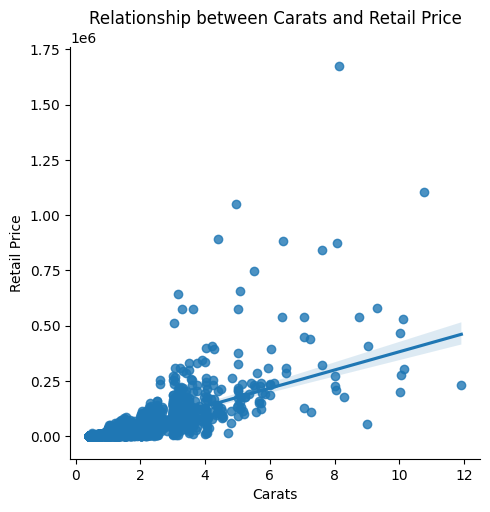

In [ ]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='Carats', y='Retail', data=df_training, fit_reg=True)

# Add title and labels
plt.title('Relationship between Carats and Retail Price')
plt.xlabel('Carats')
plt.ylabel('Retail Price')

# Show the plot
plt.show()